In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io

upload_files = files.upload()

Saving insight_test.csv to insight_test (1).csv


some notes :
df = real dataset
df_new = dataset after dropping NaN value
df_dummy = dataset after dropping user id  

In [ ]:
df = pd.read_csv('insight_test.csv')
df.head()

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
0,281605921,1,2015-06-12 03:41:44.263000+00:00,NaN,NaN,0.000029,0.0000,0.0,0.00,0.000000,...,2014-03-23 04:01:30+00:00,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619
1,281605921,1,2015-06-15 04:11:26.177000+00:00,NaN,NaN,0.000023,0.0000,0.0,0.00,0.000000,...,2014-03-23 04:01:30+00:00,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619
2,125302602,0,2015-04-24 14:07:48.720000+00:00,NaN,NaN,0.000164,0.0000,0.0,0.00,0.000000,...,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703
3,125302602,0,2015-05-04 01:05:09.518000+00:00,1.0,1.0,0.000175,0.0002,1.0,0.01,0.019864,...,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703
4,125302602,0,2015-05-15 11:18:25.739000+00:00,1.0,1.0,0.000170,0.0002,1.0,0.01,0.019324,...,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229847 entries, 0 to 229846
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 229847 non-null  int64  
 1   is_new                  229847 non-null  int64  
 2   time                    229847 non-null  object 
 3   voucher_type            38958 non-null   float64
 4   voucher_valid           41981 non-null   float64
 5   basket_amount           229847 non-null  float64
 6   voucher_max_amount      229847 non-null  float64
 7   voucher_percentage      229847 non-null  float64
 8   voucher_min_purchase    229847 non-null  float64
 9   voucher_amount          229847 non-null  float64
 10  trx_is_voucher          229847 non-null  int64  
 11  is_paid                 229847 non-null  int64  
 12  is_remitted             229847 non-null  int64  
 13  user_purchased_prior    229847 non-null  int64  
 14  num_voucher_errors  

In [93]:
df['marketing_tier'].unique()

array(['tier_1', 'tier_2', 'tier_3', nan, 'tier_4'], dtype=object)

In [95]:
marketing_tier = df['marketing_tier']
marketing_tier

5547      tier_1
15530     tier_2
159866    tier_2
131349    tier_1
137069    tier_1
           ...  
179676    tier_1
139808    tier_2
179641    tier_1
66737     tier_1
201857    tier_1
Name: marketing_tier, Length: 229847, dtype: object

In [97]:
#transform marketing tier to numerical 
from sklearn.preprocessing import LabelEncoder

In [98]:
encoder = LabelEncoder()
marketing_tier = encoder.fit_transform(marketing_tier)


In [102]:
market_province = pd.DataFrame({'province' : df['province'], 'marketing_tier' : marketing_tier})
market_province

,province,marketing_tier
5547,1,0
15530,1,1
159866,4,1
131349,1,0
137069,3,0
...,...,...
179676,3,0
139808,1,1
179641,3,0
66737,3,0


In [ ]:
df_new = df.dropna()
df_new= df_new.drop('user_id', axis=1)

In [ ]:
df_new.isna().sum()

is_new                    0
time                      0
voucher_type              0
voucher_valid             0
basket_amount             0
voucher_max_amount        0
voucher_percentage        0
voucher_min_purchase      0
voucher_amount            0
trx_is_voucher            0
is_paid                   0
is_remitted               0
user_purchased_prior      0
num_voucher_errors        0
purchase                  0
province                  0
marketing_tier            0
user_type                 0
user_group                0
account_type              0
referrer_type             0
account_created_at        0
user_register_from        0
sessions                  0
average_session_length    0
num_visit_promo_page      0
num_product_types         0
num_trx                   0
num_trx_voucher           0
gmv                       0
aov                       0
dtype: int64

In [ ]:
df['voucher_valid'].unique()

array([nan,  1.,  0.])

In [ ]:
df['voucher_valid'].isna().sum()

187866

In [92]:
df['user_id'].nunique()

69306

In [ ]:
df.dtypes

user_id                     int64
is_new                      int64
time                       object
voucher_type              float64
voucher_valid             float64
basket_amount             float64
voucher_max_amount        float64
voucher_percentage        float64
voucher_min_purchase      float64
voucher_amount            float64
trx_is_voucher              int64
is_paid                     int64
is_remitted                 int64
user_purchased_prior        int64
num_voucher_errors          int64
purchase                    int64
province                    int64
marketing_tier             object
user_type                   int64
user_group                  int64
account_type                int64
referrer_type               int64
account_created_at         object
user_register_from          int64
sessions                  float64
average_session_length    float64
num_visit_promo_page      float64
num_product_types         float64
num_trx                   float64
num_trx_vouche

In [ ]:
df['user_id'].nunique()

69306

In [ ]:
df['user_id'].count()

229847

In [ ]:
df['is_paid'].unique()

array([0, 1])

In [ ]:
date = pd.to_datetime(df['time']).dt.strftime('%Y-%m-%d')
total_perdate = date.value_counts()

In [ ]:
df.insert(loc=1, column='date', value= date)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df=df.sort_values('date')

In [ ]:
df.head(5)

,user_id,date,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
5547,540621668,2015-03-20,0,2015-03-20 17:17:26.124000+00:00,NaN,NaN,0.000036,0.0000,0.0,0.00,...,2014-12-22 06:01:01+00:00,0,0.075922,0.001169,0.013514,0.258065,0.000520,0.002309,0.033972,0.156029
15530,28756772,2015-03-20,0,2015-03-20 19:20:01.029000+00:00,NaN,NaN,0.000013,0.0000,0.0,0.00,...,2011-12-02 16:46:47+00:00,0,0.005061,0.005029,0.000000,0.032258,0.000012,0.000000,0.033311,0.157350
159866,537318031,2015-03-20,0,2015-03-20 22:07:26.956000+00:00,NaN,NaN,0.000028,0.0000,0.0,0.00,...,2014-12-15 02:41:41+00:00,0,0.026211,0.003031,0.000000,0.064516,0.000023,0.000000,0.033279,0.156085
131349,100771635,2015-03-20,0,2015-03-20 22:16:29.094000+00:00,NaN,0.0,0.000001,0.0004,1.0,0.01,...,2013-04-30 09:18:41+00:00,1,0.091649,0.001190,0.006757,0.161290,0.000135,0.011547,0.033587,0.156367
137069,81932675,2015-03-20,0,2015-03-20 23:43:22.557000+00:00,NaN,NaN,0.000067,0.0000,0.0,0.00,...,2013-02-17 06:28:53+00:00,1,0.153832,0.000627,0.020270,0.258065,0.001673,0.000000,0.034341,0.155811


In [ ]:
date_acount_create = pd.to_datetime(df['account_created_at']).dt.strftime('%Y-%m-%d')

In [ ]:
df.insert(loc=2, column='account_create_date', value= date_acount_create)

In [ ]:
df['account_create_date'] = pd.to_datetime(df['account_create_date'])

In [ ]:
df.head(5)

,user_id,date,account_create_date,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
5547,540621668,2015-03-20,2014-12-22,0,2015-03-20 17:17:26.124000+00:00,NaN,NaN,0.000036,0.0000,0.0,...,2014-12-22 06:01:01+00:00,0,0.075922,0.001169,0.013514,0.258065,0.000520,0.002309,0.033972,0.156029
15530,28756772,2015-03-20,2011-12-02,0,2015-03-20 19:20:01.029000+00:00,NaN,NaN,0.000013,0.0000,0.0,...,2011-12-02 16:46:47+00:00,0,0.005061,0.005029,0.000000,0.032258,0.000012,0.000000,0.033311,0.157350
159866,537318031,2015-03-20,2014-12-15,0,2015-03-20 22:07:26.956000+00:00,NaN,NaN,0.000028,0.0000,0.0,...,2014-12-15 02:41:41+00:00,0,0.026211,0.003031,0.000000,0.064516,0.000023,0.000000,0.033279,0.156085
131349,100771635,2015-03-20,2013-04-30,0,2015-03-20 22:16:29.094000+00:00,NaN,0.0,0.000001,0.0004,1.0,...,2013-04-30 09:18:41+00:00,1,0.091649,0.001190,0.006757,0.161290,0.000135,0.011547,0.033587,0.156367
137069,81932675,2015-03-20,2013-02-17,0,2015-03-20 23:43:22.557000+00:00,NaN,NaN,0.000067,0.0000,0.0,...,2013-02-17 06:28:53+00:00,1,0.153832,0.000627,0.020270,0.258065,0.001673,0.000000,0.034341,0.155811


In [ ]:
usia = df['date']-df['account_create_date'] #age of account (data type is time delta)

In [ ]:
age = pd.to_numeric(usia.dt.days, downcast='integer') #convert time delta to int

In [ ]:
df.insert(loc=3, column='account_age (days)', value= age) 

In [ ]:
df[df['is_new']== 1]['account_age (days)'].value_counts()

0       19779
1        1039
2         640
3         242
4         203
        ...  
3057        1
1413        1
1140        1
1746        1
1791        1
Name: account_age (days), Length: 1442, dtype: int64

In [ ]:
df.head(5)

,user_id,date,account_create_date,account_age (days),is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
5547,540621668,2015-03-20,2014-12-22,88,0,2015-03-20 17:17:26.124000+00:00,NaN,NaN,0.000036,0.0000,...,2014-12-22 06:01:01+00:00,0,0.075922,0.001169,0.013514,0.258065,0.000520,0.002309,0.033972,0.156029
15530,28756772,2015-03-20,2011-12-02,1204,0,2015-03-20 19:20:01.029000+00:00,NaN,NaN,0.000013,0.0000,...,2011-12-02 16:46:47+00:00,0,0.005061,0.005029,0.000000,0.032258,0.000012,0.000000,0.033311,0.157350
159866,537318031,2015-03-20,2014-12-15,95,0,2015-03-20 22:07:26.956000+00:00,NaN,NaN,0.000028,0.0000,...,2014-12-15 02:41:41+00:00,0,0.026211,0.003031,0.000000,0.064516,0.000023,0.000000,0.033279,0.156085
131349,100771635,2015-03-20,2013-04-30,689,0,2015-03-20 22:16:29.094000+00:00,NaN,0.0,0.000001,0.0004,...,2013-04-30 09:18:41+00:00,1,0.091649,0.001190,0.006757,0.161290,0.000135,0.011547,0.033587,0.156367
137069,81932675,2015-03-20,2013-02-17,761,0,2015-03-20 23:43:22.557000+00:00,NaN,NaN,0.000067,0.0000,...,2013-02-17 06:28:53+00:00,1,0.153832,0.000627,0.020270,0.258065,0.001673,0.000000,0.034341,0.155811


In [ ]:
average= df['account_age (days)'].mean()
modes = df['account_age (days)'].mode()
maximum = max(df['account_age (days)'])
minimum = min(df['account_age (days)'])

print("average age of account", average)
print("modes age of account", modes)
print("the oldest age of account", maximum)
print("the lattest account joined", minimum)


average age of account 376.5415776581813
modes age of account 0    0
dtype: int16
the oldest age of account 3753
the lattest account joined -1


In [ ]:
df_dummy=df.drop(['user_id'], axis=1)

In [ ]:
df_dummy.head()

,date,account_create_date,account_age (days),is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
5547,2015-03-20,2014-12-22,88,0,2015-03-20 17:17:26.124000+00:00,NaN,NaN,0.000036,0.0000,0.0,...,2014-12-22 06:01:01+00:00,0,0.075922,0.001169,0.013514,0.258065,0.000520,0.002309,0.033972,0.156029
15530,2015-03-20,2011-12-02,1204,0,2015-03-20 19:20:01.029000+00:00,NaN,NaN,0.000013,0.0000,0.0,...,2011-12-02 16:46:47+00:00,0,0.005061,0.005029,0.000000,0.032258,0.000012,0.000000,0.033311,0.157350
159866,2015-03-20,2014-12-15,95,0,2015-03-20 22:07:26.956000+00:00,NaN,NaN,0.000028,0.0000,0.0,...,2014-12-15 02:41:41+00:00,0,0.026211,0.003031,0.000000,0.064516,0.000023,0.000000,0.033279,0.156085
131349,2015-03-20,2013-04-30,689,0,2015-03-20 22:16:29.094000+00:00,NaN,0.0,0.000001,0.0004,1.0,...,2013-04-30 09:18:41+00:00,1,0.091649,0.001190,0.006757,0.161290,0.000135,0.011547,0.033587,0.156367
137069,2015-03-20,2013-02-17,761,0,2015-03-20 23:43:22.557000+00:00,NaN,NaN,0.000067,0.0000,0.0,...,2013-02-17 06:28:53+00:00,1,0.153832,0.000627,0.020270,0.258065,0.001673,0.000000,0.034341,0.155811


In [ ]:
purchase_1_days= df_dummy[df_dummy['purchase']==1]['account_age (days)']
purchase_1_days

5547       88
159866     95
137069    761
204462      0
204838    707
         ... 
179676    666
139808    892
179641    701
66737     673
201857     56
Name: account_age (days), Length: 222467, dtype: int16

In [ ]:
max(purchase_1_days)

3753

In [ ]:
purchase_0_days= df_dummy[df_dummy['purchase']==0]['account_age (days)']
purchase_0_days

15530     1204
131349     689
126881       7
161035     613
171249       0
          ... 
25641      487
175972     103
221059      80
68164      461
220623    1791
Name: account_age (days), Length: 7380, dtype: int16

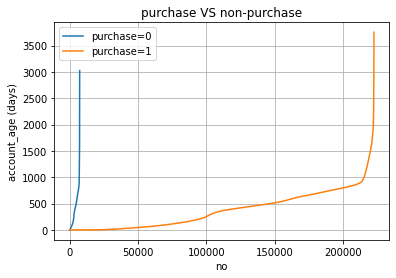

In [ ]:
plt.plot(sorted(purchase_0_days),'-')
plt.plot(sorted(purchase_1_days),'-')
plt.title('purchase VS non-purchase')
plt.xlabel('no')
plt.ylabel('account_age (days)')
plt.legend(('purchase=0','purchase=1'),loc=0)
plt.grid(True)
plt.savefig('jakarta_total.png',format='png')
plt.show()

In [ ]:
max(purchase_0_days)

3025

Text(0.5, 1.0, 'correlation of basket_amount to other variables')

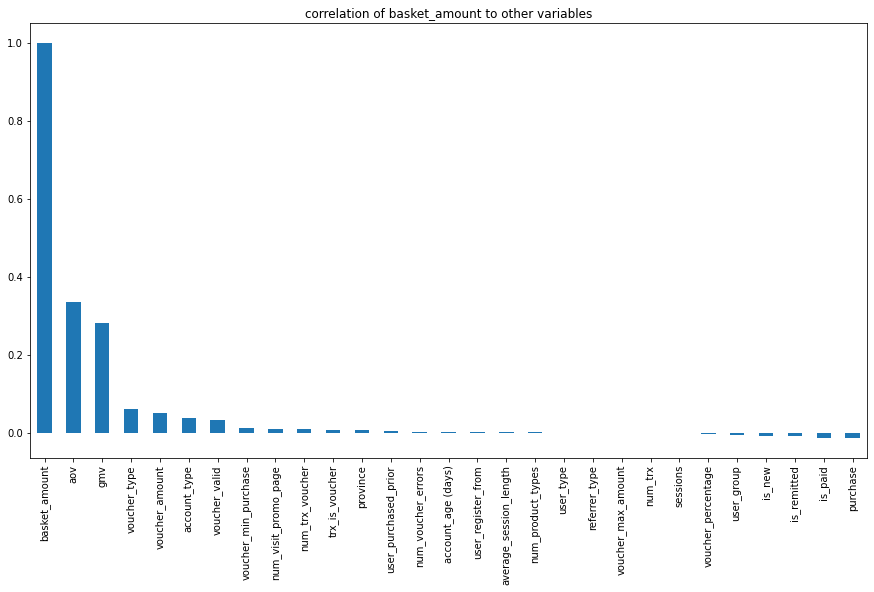

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['basket_amount'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of basket_amount to other variables")

Text(0.5, 1.0, 'correlation of voucher_amount to other variables')

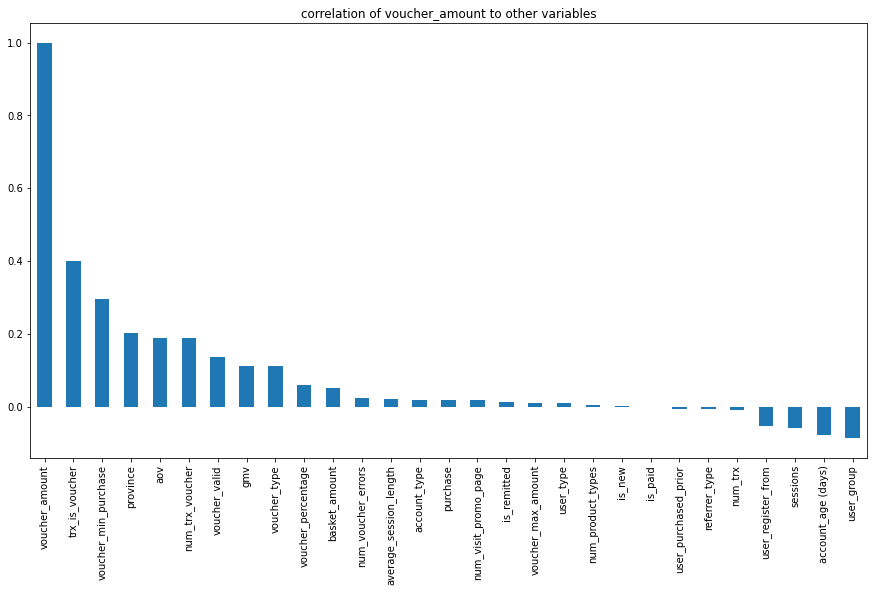

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['voucher_amount'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of voucher_amount to other variables")

In [ ]:
df['trx_is_voucher'].nunique()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


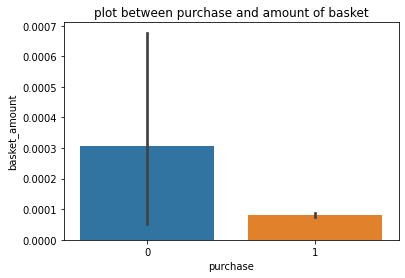

In [ ]:
sns.barplot(df['purchase'], df['basket_amount'])
plt.title("plot between purchase and amount of basket")
plt.show()

Text(0.5, 1.0, 'correlation of account_age (days) to other variables')

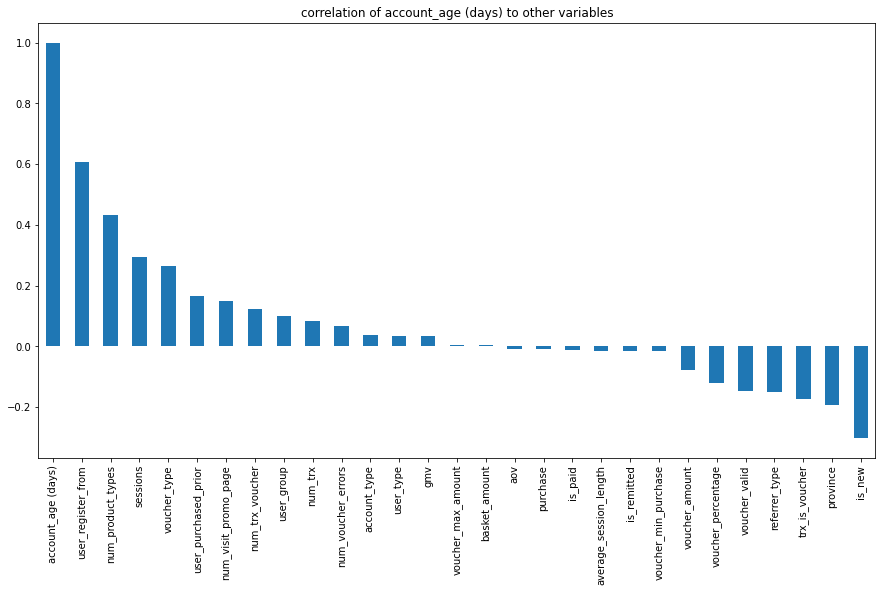

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['account_age (days)'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of account_age (days) to other variables")

Text(0.5, 1.0, 'correlation of platform of register to other variables')

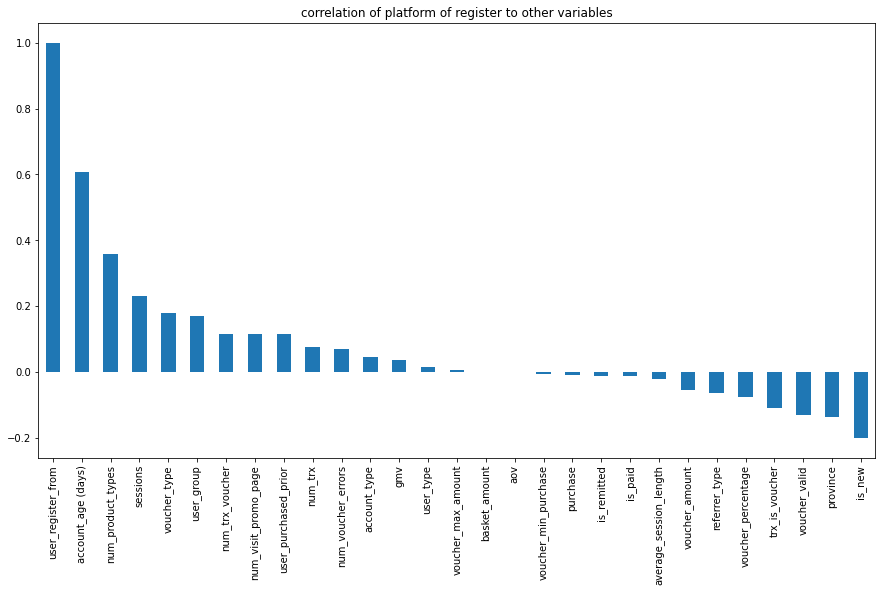

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['user_register_from'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of platform of register to other variables")

Text(0.5, 1.0, 'correlation of gmv to other variables')

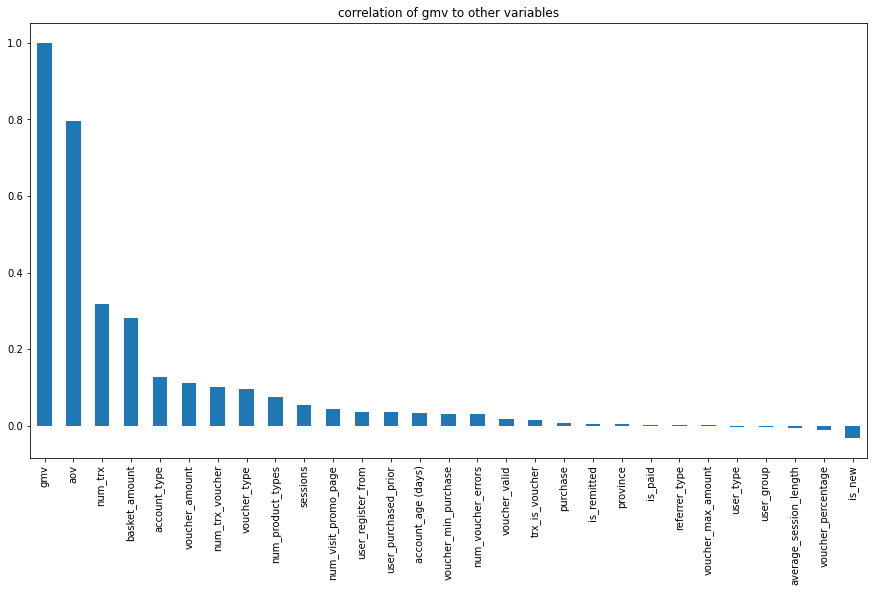

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['gmv'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of gmv to other variables")

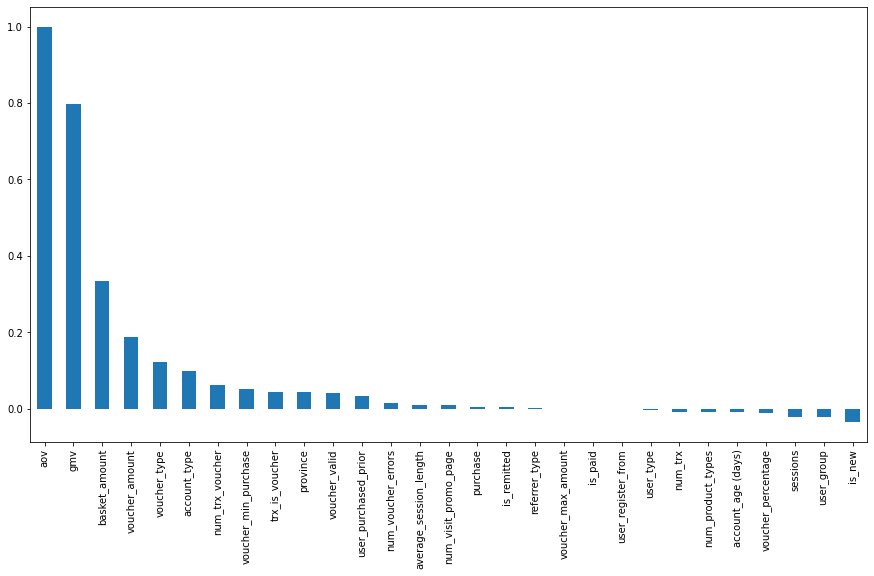

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['aov'].sort_values(ascending = False).plot(kind='bar')

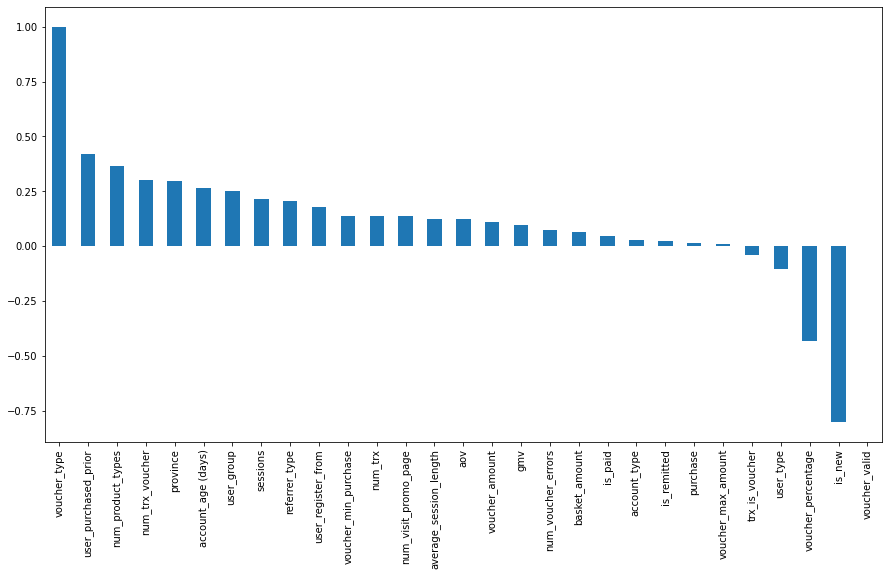

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['voucher_type'].sort_values(ascending = False).plot(kind='bar')

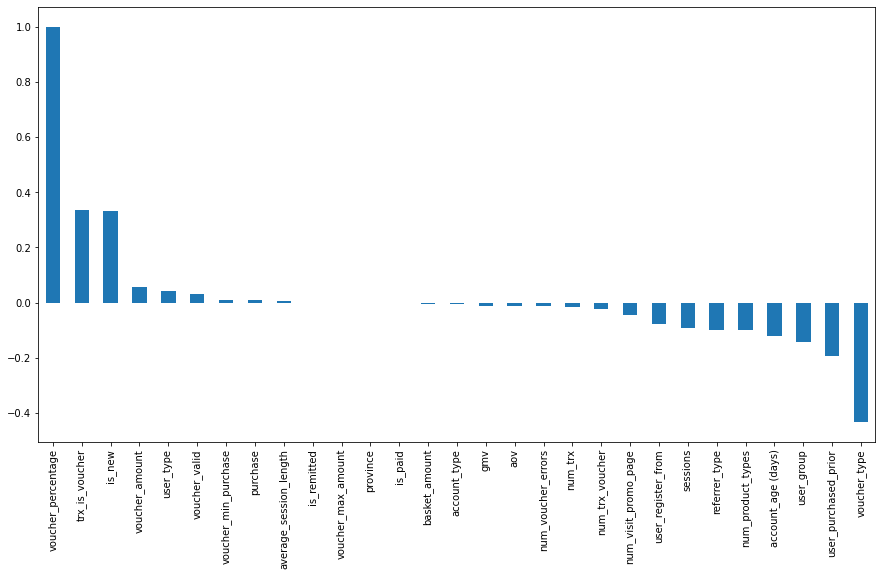

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['voucher_percentage'].sort_values(ascending = False).plot(kind='bar')

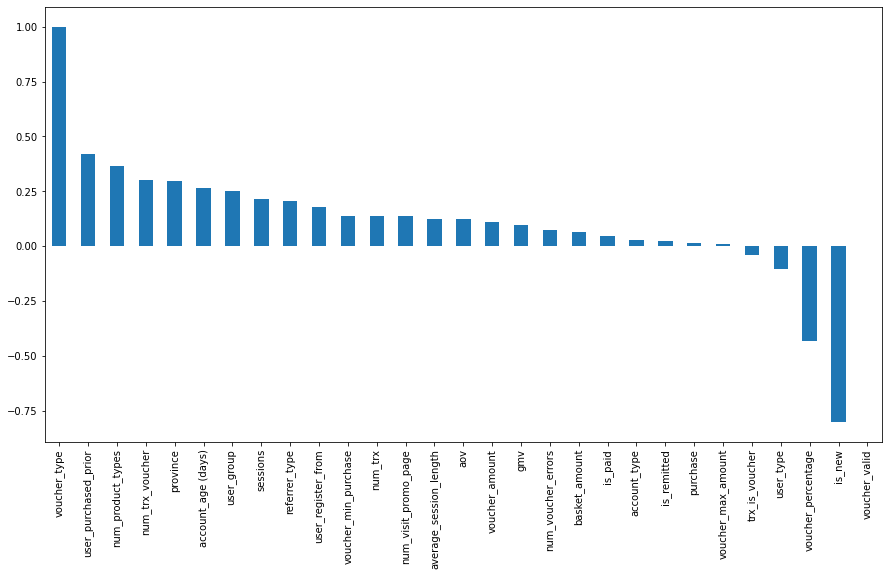

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['voucher_type'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'correlation of decision to purchase or not to other variables')

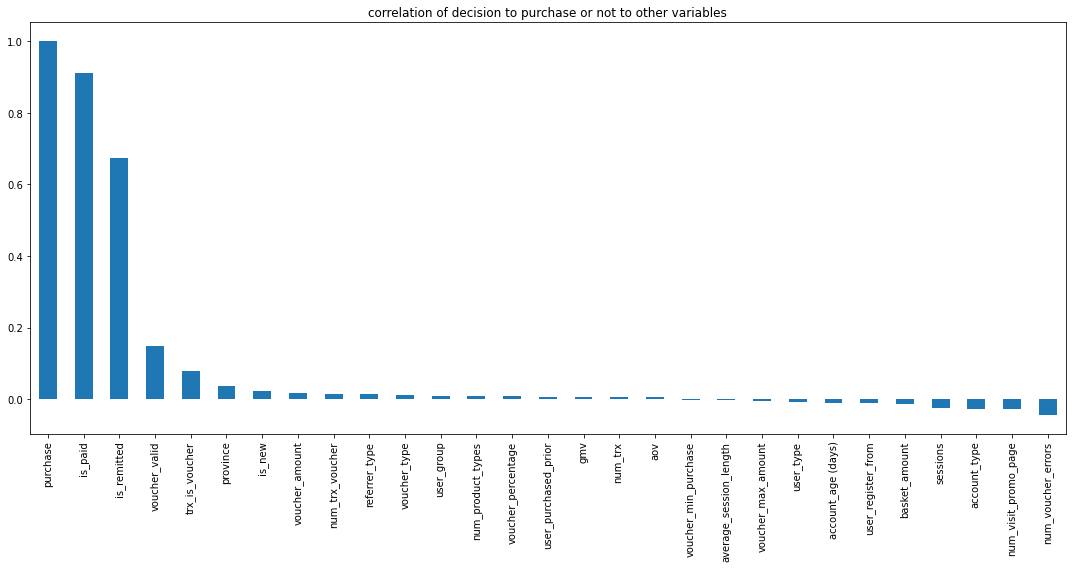

In [ ]:
plt.figure(figsize=(15,8))
df_dummy.corr()['purchase'].sort_values(ascending = False).plot(kind='bar')
plt.title("correlation of decision to purchase or not to other variables")

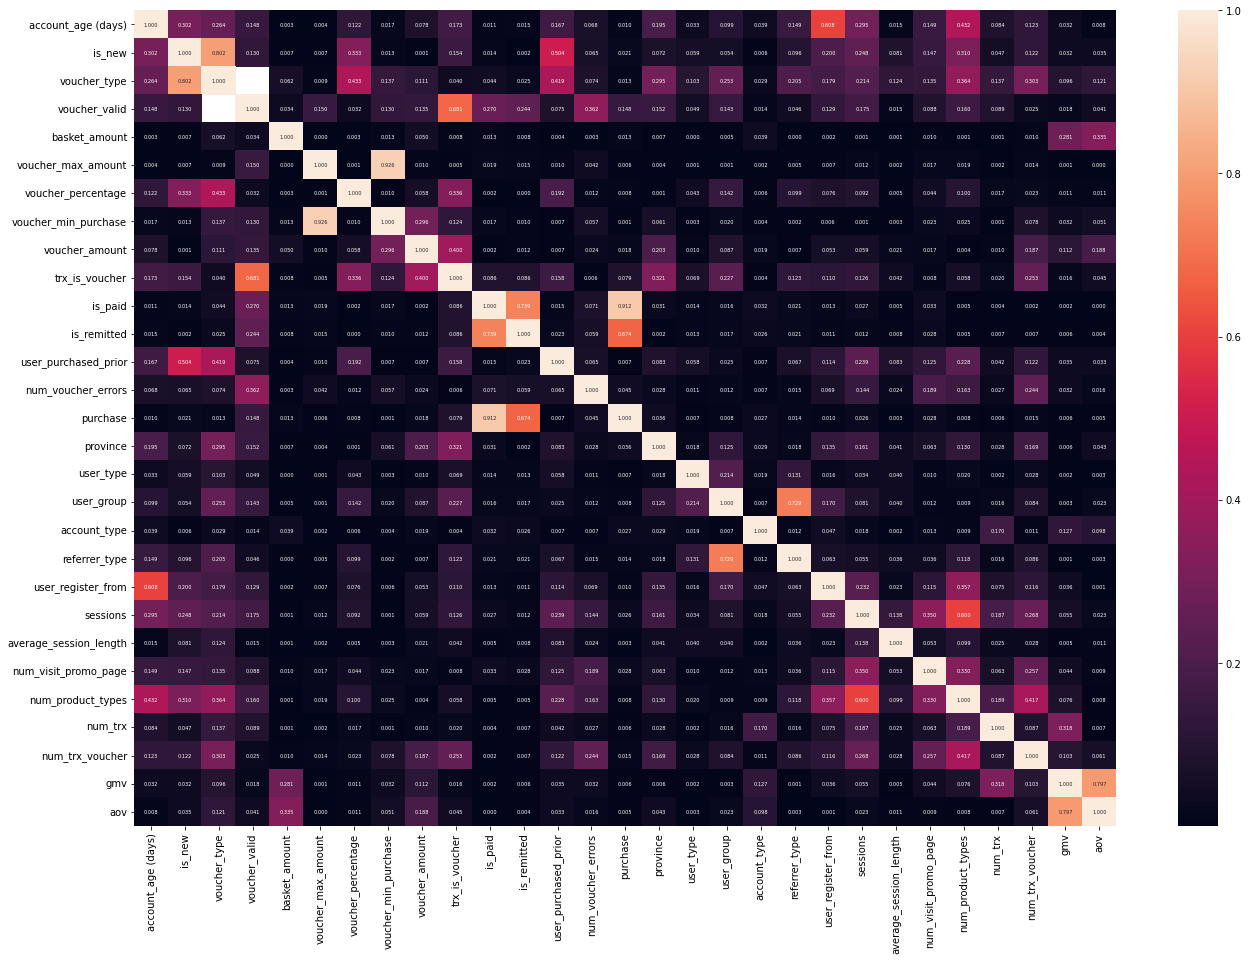

In [ ]:
# Standard size for images
plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams['font.size'] = 30
plt.rcParams['font.size'] = 10
matrix_corr = df_dummy.corr().abs()
ax = plt.subplots(figsize=[22,15])
ax = sns.heatmap(matrix_corr, annot=True, annot_kws={"size": 5}, fmt='.3f')
plt.savefig("correlation.png")

In [ ]:
df['is_new'].value_counts()[1] #count the new 

29858

In [ ]:
df['is_new'].value_counts()[0] #count the new 

199989

In [ ]:
df.groupby(['aov', 'is_new']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:3]


,aov,is_new,Count
0,0.155619,1,22415
1,0.155619,0,4693
2,0.156296,0,458


In [ ]:
df.groupby(['basket_amount', 'purchase']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:10]

,basket_amount,purchase,Count
0,0.000026,1,2922
1,0.000019,1,1354
2,0.000010,1,1184
3,0.000010,1,1158
4,0.000011,1,1147
5,0.000028,1,1114
6,0.000010,1,1029
7,0.000022,1,966
8,0.000028,1,949
9,0.000015,1,892


In [ ]:
df_new[df_new['purchase']== 1]['basket_amount']

3         0.000175
4         0.000170
23        0.000072
26        0.000058
27        0.000060
            ...   
229823    0.000095
229835    0.000016
229836    0.000011
229838    0.000027
229846    0.000026
Name: basket_amount, Length: 38253, dtype: float64

In [ ]:
purchase_0 = df_new[df_new['purchase']== 0]['basket_amount']
purchase_0
max(purchase_0)
min(purchase_0)

8.79e-08

In [ ]:
df.groupby(['is_paid', 'is_new']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:5]


,is_paid,is_new,Count
0,1,0,192116
1,1,1,28917
2,0,0,7873
3,0,1,941


In [ ]:
df.groupby(['num_trx', 'num_visit_promo_page']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:20]


,num_trx,num_visit_promo_page,Count
0,0.000000,0.000000,26481
1,0.000002,0.000000,10103
2,0.000004,0.000000,6341
3,0.000006,0.000000,4938
4,0.000008,0.000000,4299
5,0.000010,0.000000,3231
6,0.000012,0.000000,2647
7,0.000014,0.000000,2349
8,0.000016,0.000000,2249
9,0.000018,0.000000,1926


In [ ]:
df['num_trx']

5547      0.000520
15530     0.000012
159866    0.000023
131349    0.000135
137069    0.001673
            ...   
179676    0.000055
139808    0.000002
179641    0.001291
66737     0.000157
201857    0.000155
Name: num_trx, Length: 229847, dtype: float64

In [ ]:
df.groupby(['voucher_percentage', 'account_age (days)']).size().reset_index().rename(columns = {0 : 'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)[0:30]


,voucher_percentage,account_age (days),Count
0,0.0,0,14642
1,15.0,0,3436
2,99.0,0,1403
3,0.0,1,1353
4,0.0,2,1006
5,0.0,3,903
6,0.0,4,784
7,0.0,7,766
8,0.0,5,745
9,0.0,8,696


<function matplotlib.pyplot.show(*args, **kw)>

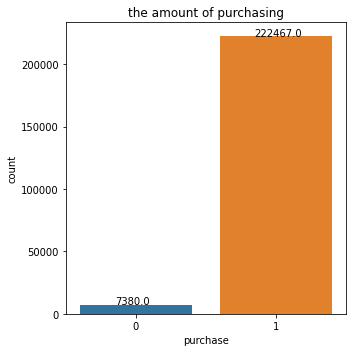

In [ ]:
plt.title("the amount of purchasing")
plt.rcParams['figure.figsize']=[5, 5]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='purchase', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

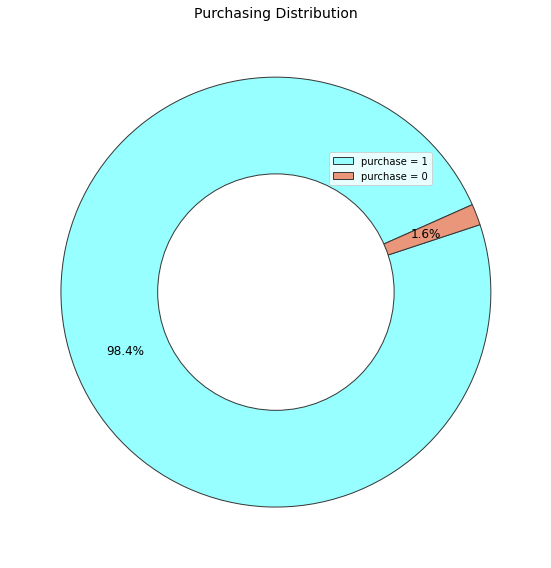

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Color Setting

colors = ['#97FFFF', '#E9967A', '#8EBAD9']
tcolor_dict = {
    True : "#97FFFF",
    False : "#E9967A"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x = df_new['purchase'].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":12},
        colors=colors, wedgeprops={'edgecolor':'#383838'});

ax.set_title("Purchasing Distribution", fontdict={'fontsize':14})
ax.legend(["purchase = 1", "purchase = 0"], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

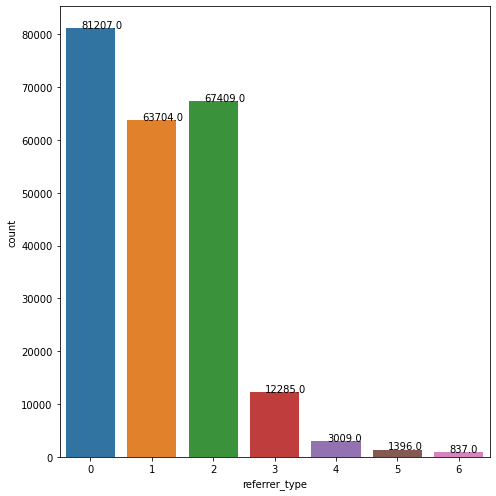

In [ ]:
plt.rcParams['figure.figsize']=[7, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='referrer_type', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

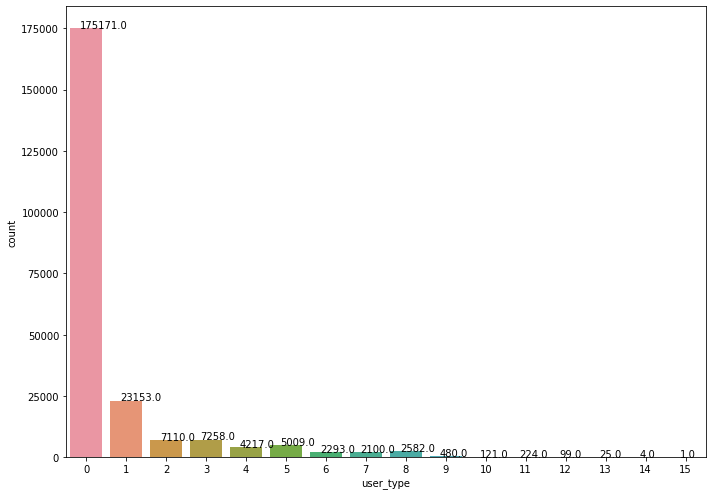

In [ ]:
plt.rcParams['figure.figsize']=[10, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='user_type', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

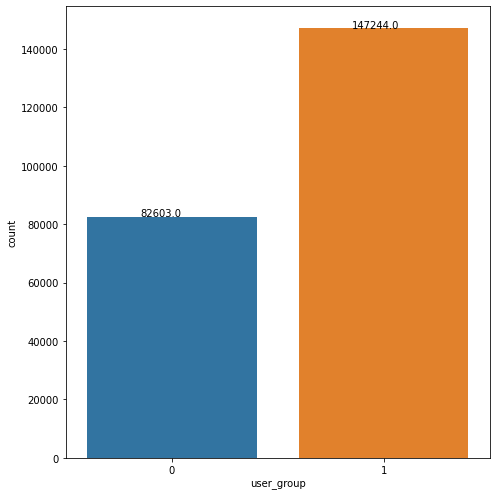

In [ ]:
plt.rcParams['figure.figsize']=[7, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='user_group', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

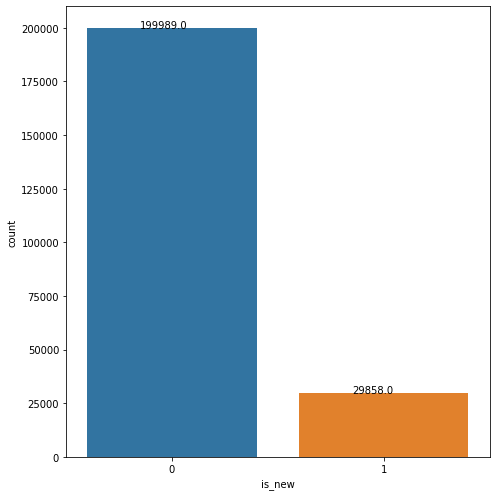

In [ ]:
plt.rcParams['figure.figsize']=[7, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='is_new', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

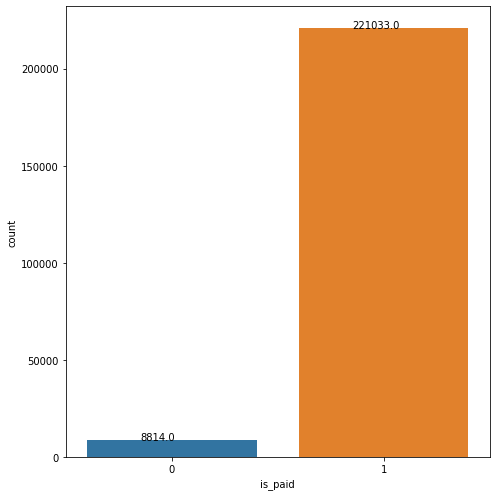

In [ ]:
plt.rcParams['figure.figsize']=[7, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='is_paid', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

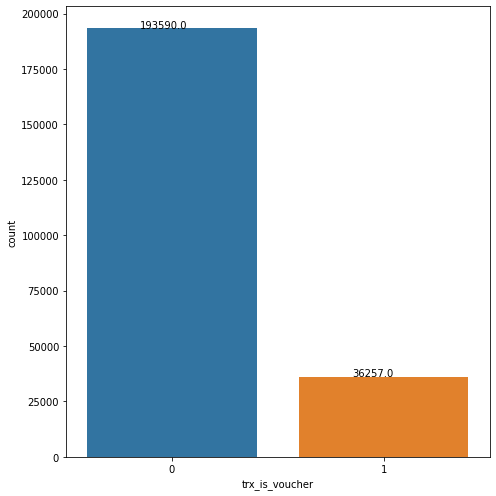

In [ ]:
plt.rcParams['figure.figsize']=[7, 7]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='trx_is_voucher', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

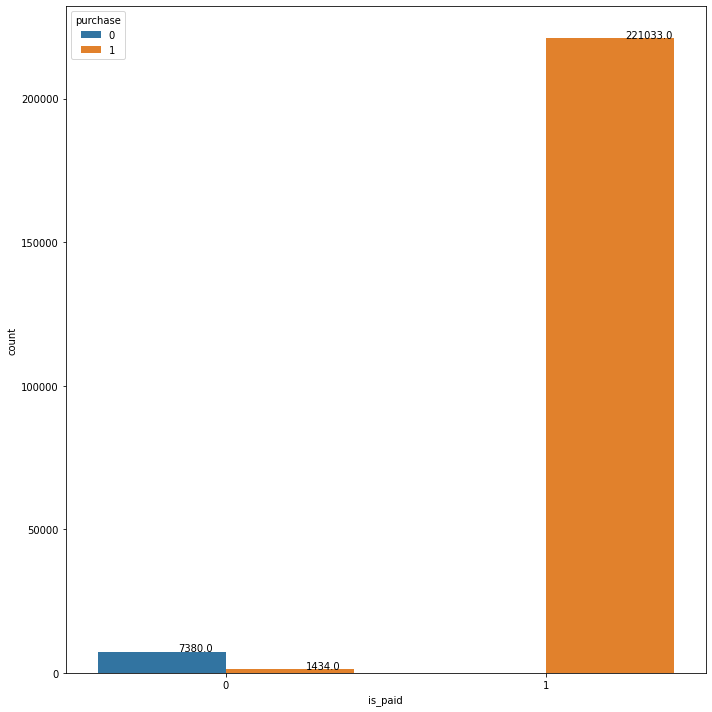

In [ ]:
plt.figure(num= None, figsize= (10,10))

ax= sns.countplot(data= df, x='is_paid', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

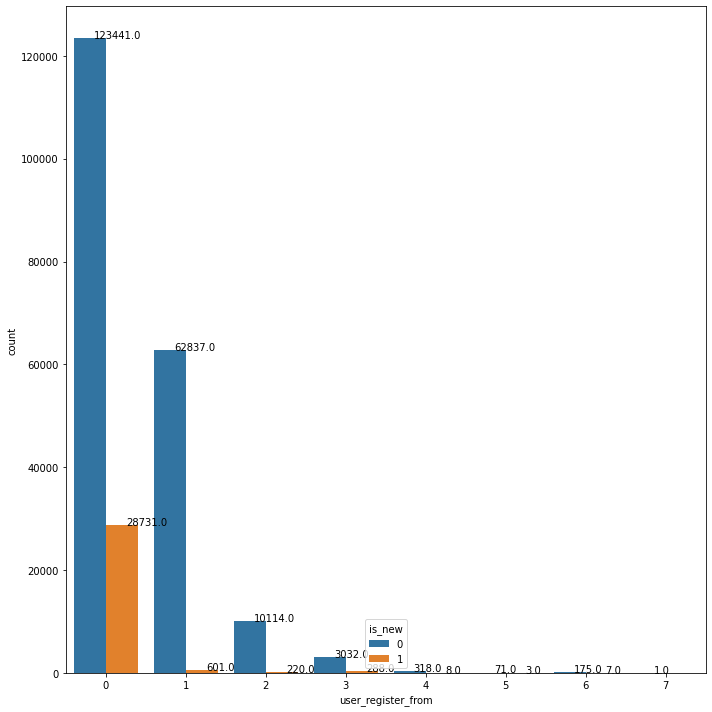

In [ ]:
plt.figure(num= None, figsize= (10,10))

ax= sns.countplot(data= df, x='user_register_from', hue = 'is_new', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

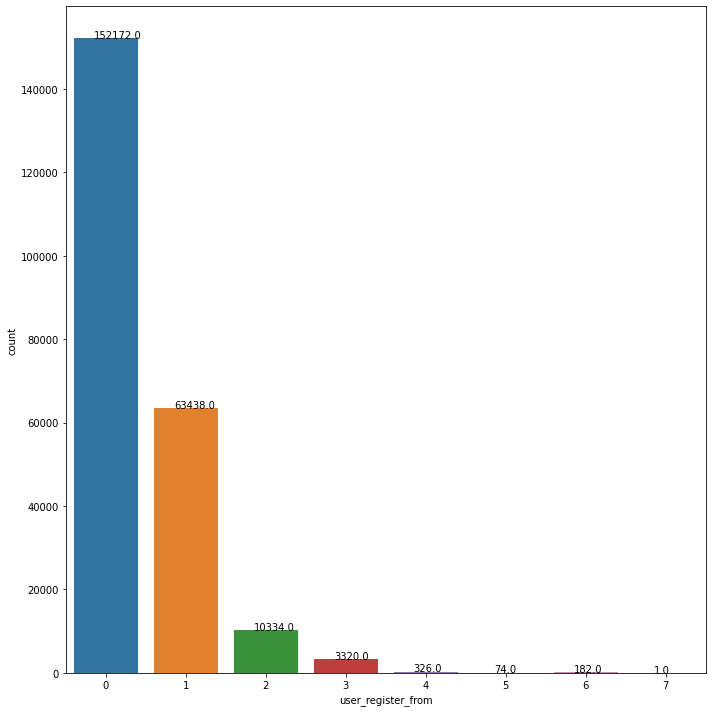

In [ ]:
plt.rcParams['figure.figsize']=[10, 10]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='user_register_from', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

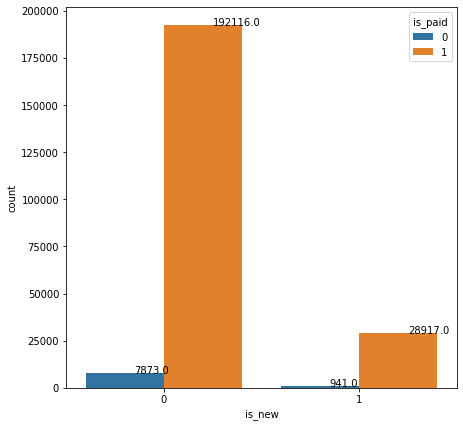

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_new', hue = 'is_paid', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()


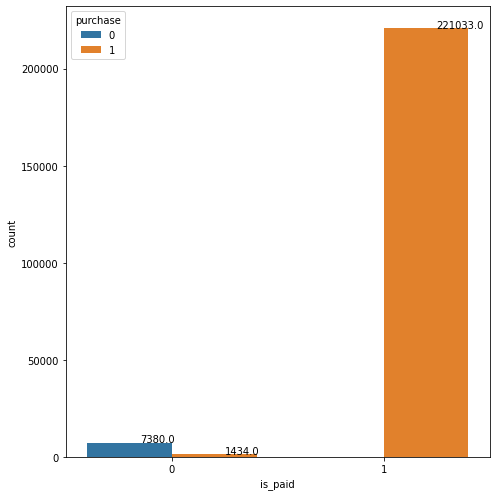

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_paid', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()


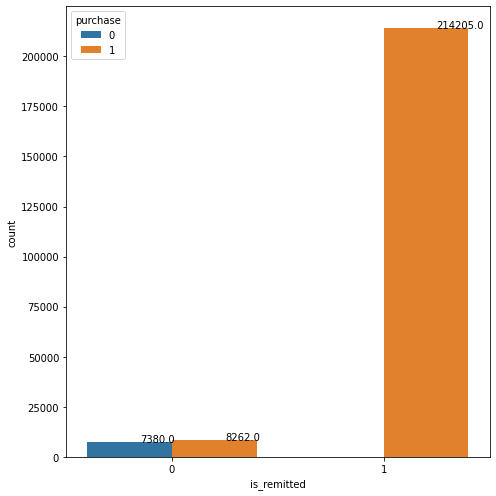

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_remitted', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()


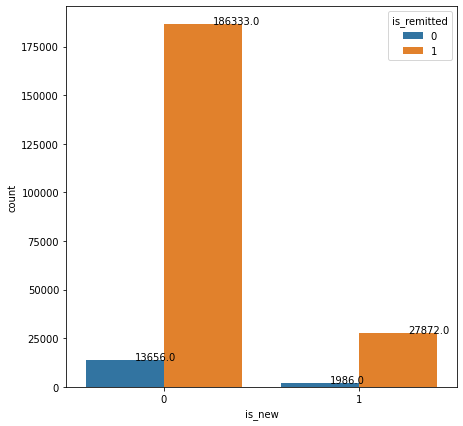

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_new', hue = 'is_remitted', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

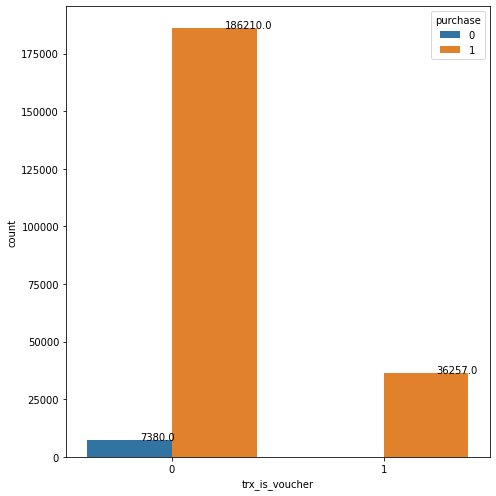

In [90]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='trx_is_voucher', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

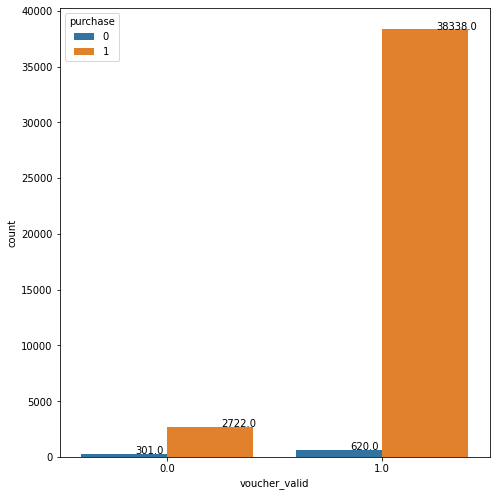

In [91]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='voucher_valid', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

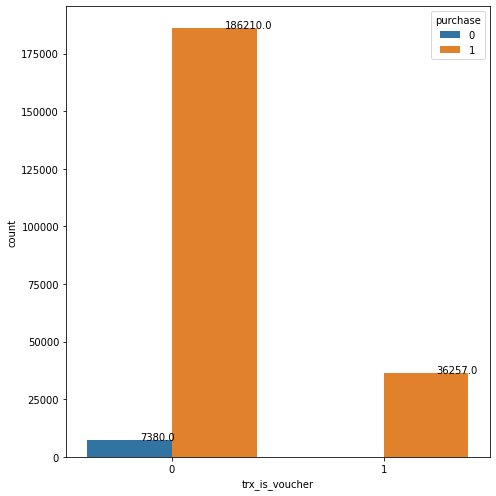

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='trx_is_voucher', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

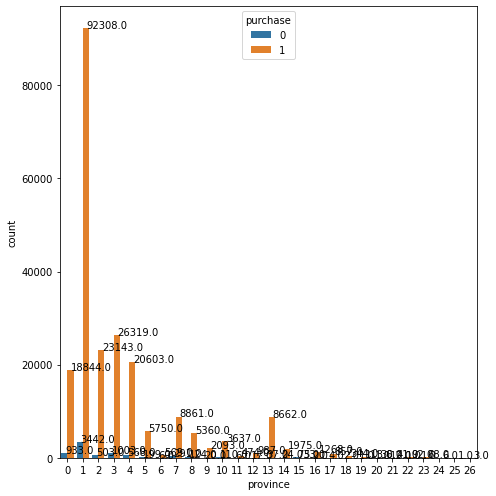

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='province', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

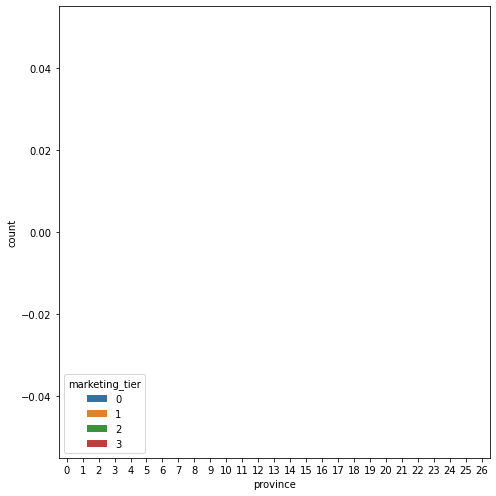

In [99]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='province', hue = 'marketing_tier', hue_order= [0,1,2,3])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

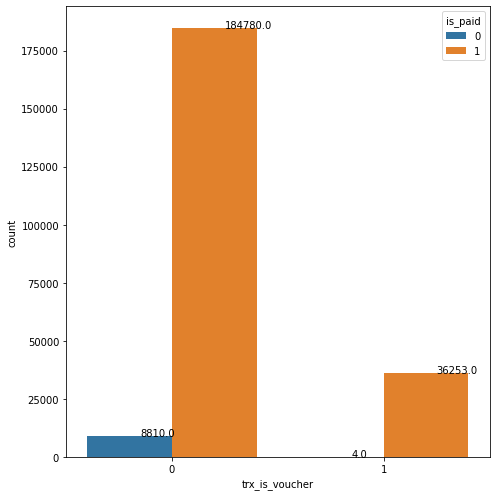

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='trx_is_voucher', hue = 'is_paid', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

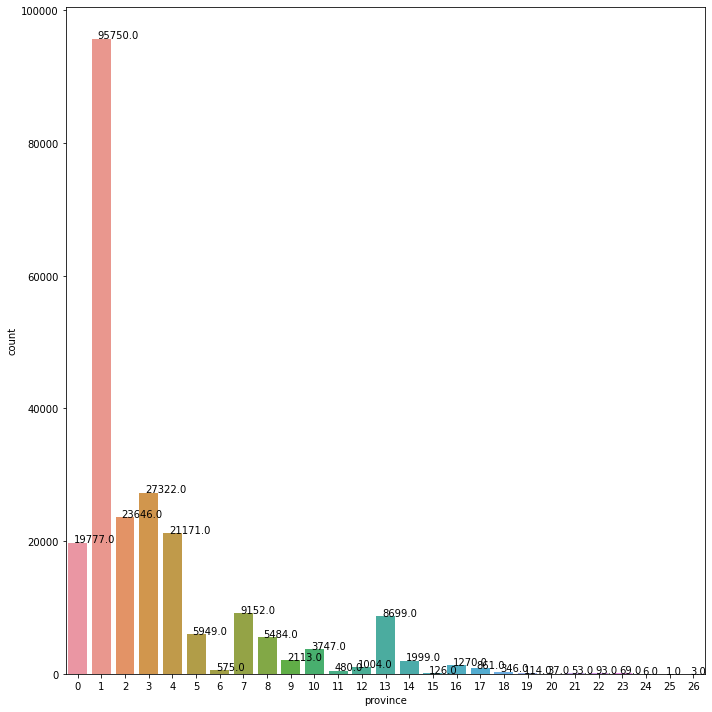

In [ ]:
plt.rcParams['figure.figsize']=[10, 10]
plt.rcParams['figure.autolayout']= True

ax=sns.countplot(x='province', data=df)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show

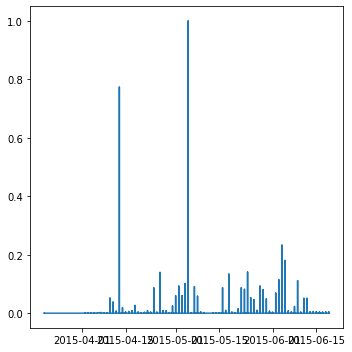

In [ ]:

plt.plot(df['date'], df['basket_amount'])
#plt.figure(figsize= (30,30))

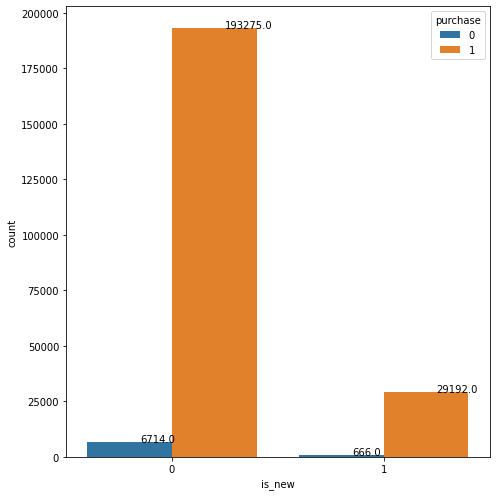

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_new', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

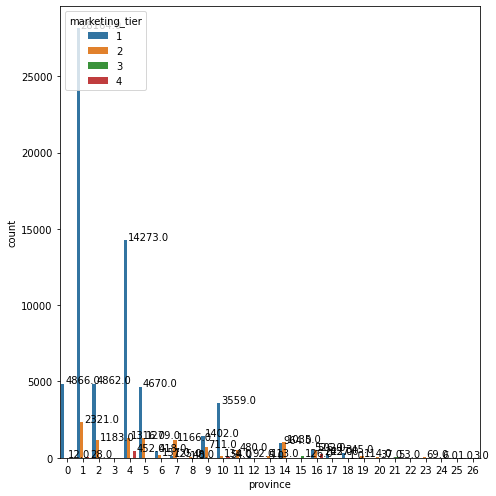

In [104]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= market_province, x='province', hue = 'marketing_tier', hue_order= [1,2,3,4])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

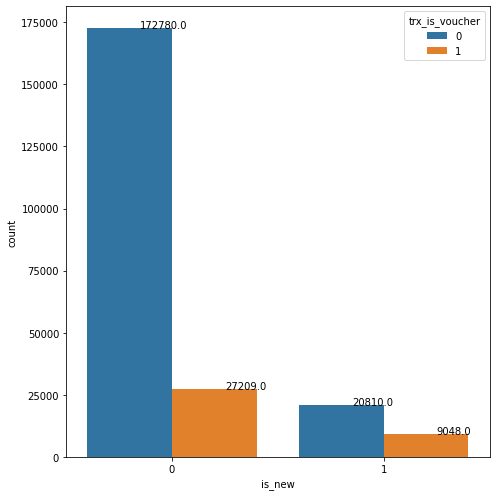

In [ ]:
plt.figure(num= None, figsize= (7,7))

ax= sns.countplot(data= df, x='is_new', hue = 'trx_is_voucher', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

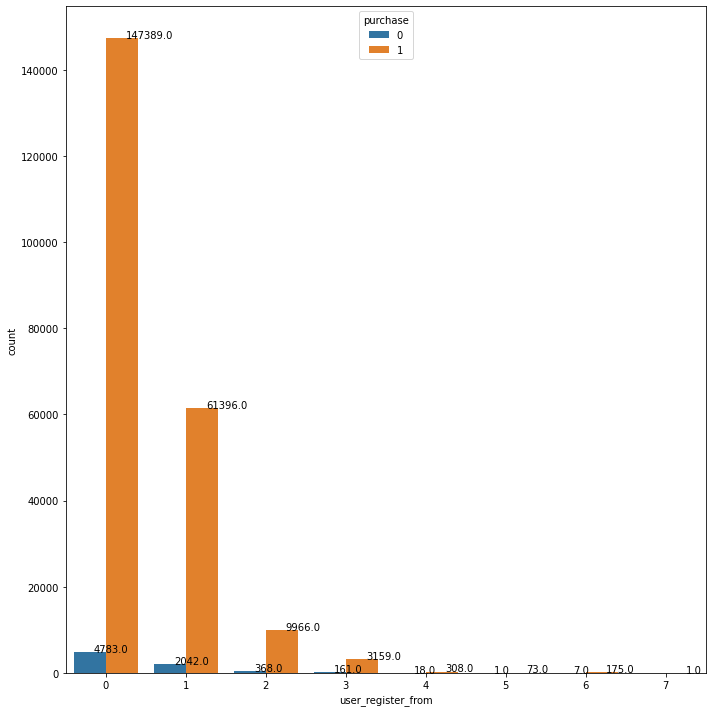

In [ ]:
plt.figure(num= None, figsize= (10,10))

ax= sns.countplot(data= df, x='user_register_from', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

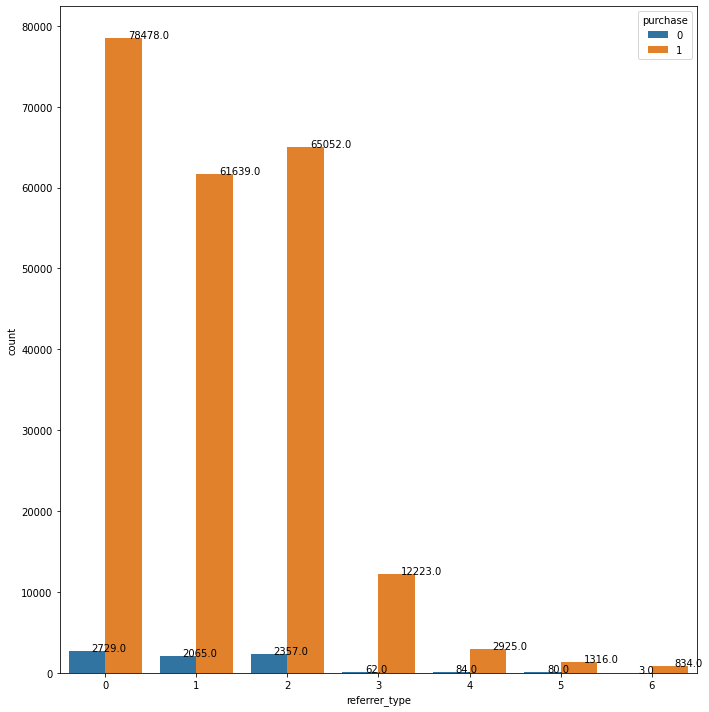

In [ ]:
plt.figure(num= None, figsize= (10,10))

ax= sns.countplot(data= df, x='referrer_type', hue = 'purchase', hue_order= [0,1])

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

plt.show()

In [ ]:
numeric_columns = [column for column in df_dummy.columns if (df_dummy[column].dtype == 'float64' or df_dummy[column].dtype == 'int64')]
print(numeric_columns)

['is_new', 'voucher_type', 'voucher_valid', 'basket_amount', 'voucher_max_amount', 'voucher_percentage', 'voucher_min_purchase', 'voucher_amount', 'trx_is_voucher', 'is_paid', 'is_remitted', 'user_purchased_prior', 'num_voucher_errors', 'purchase', 'province', 'user_type', 'user_group', 'account_type', 'referrer_type', 'user_register_from', 'sessions', 'average_session_length', 'num_visit_promo_page', 'num_product_types', 'num_trx', 'num_trx_voucher', 'gmv', 'aov']


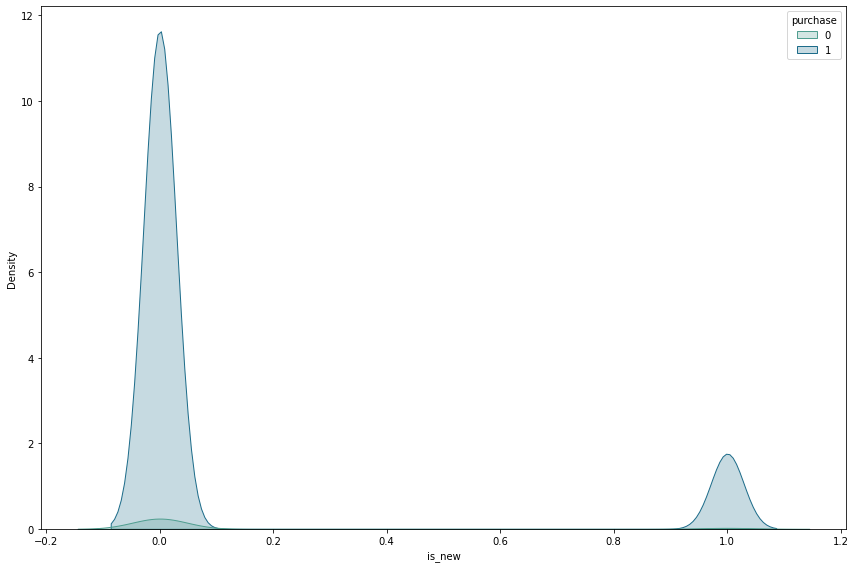

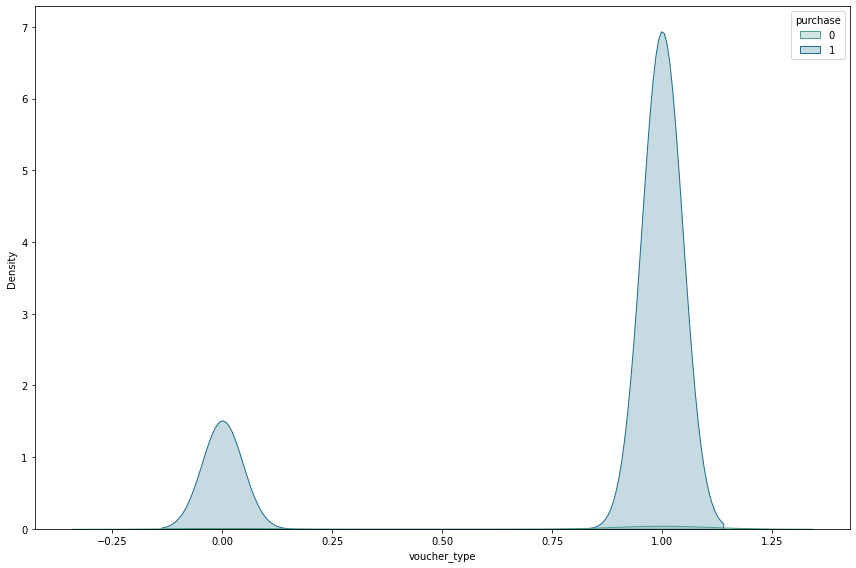

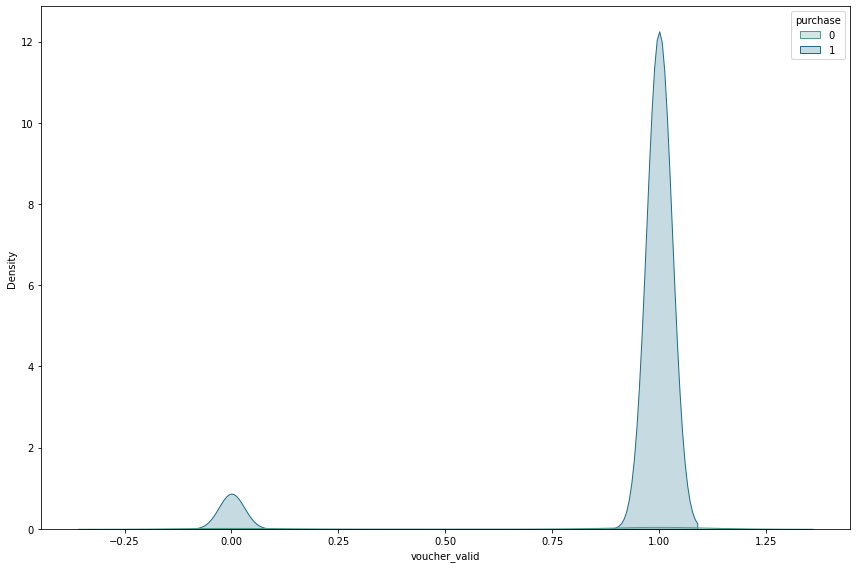

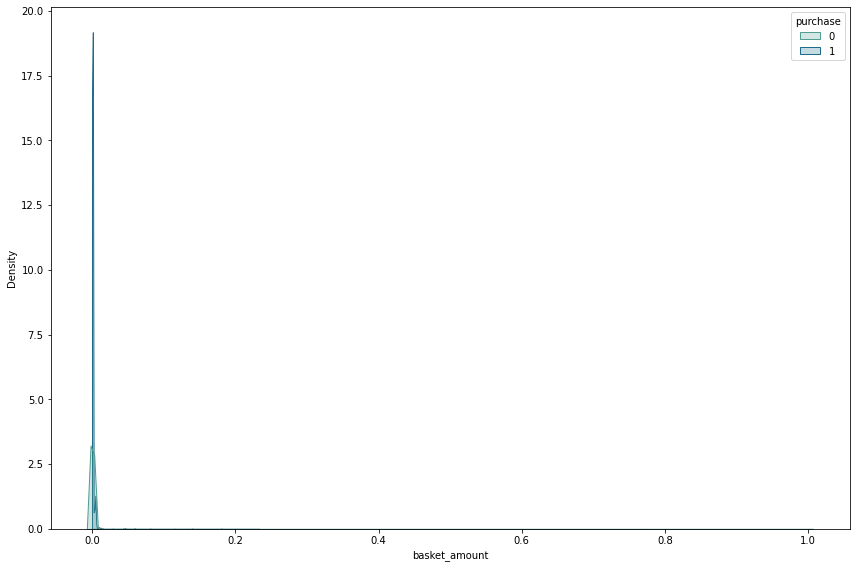

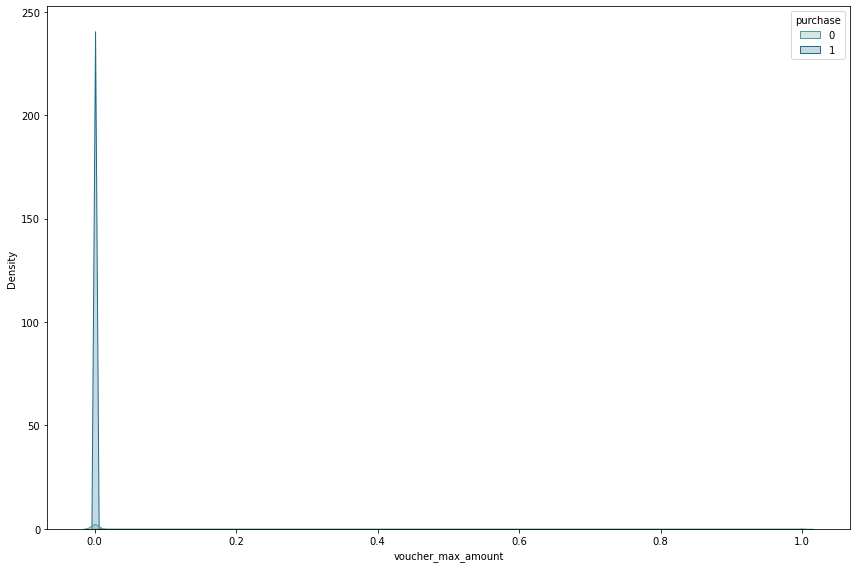

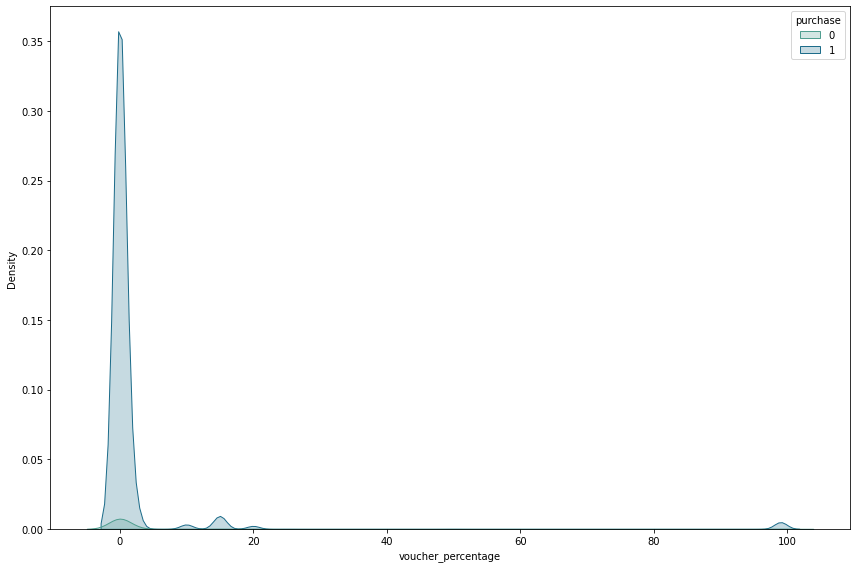

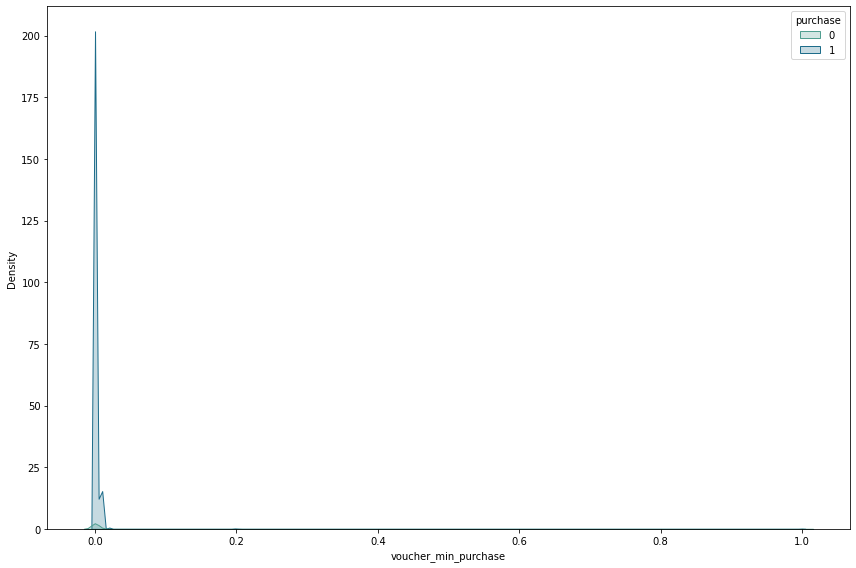

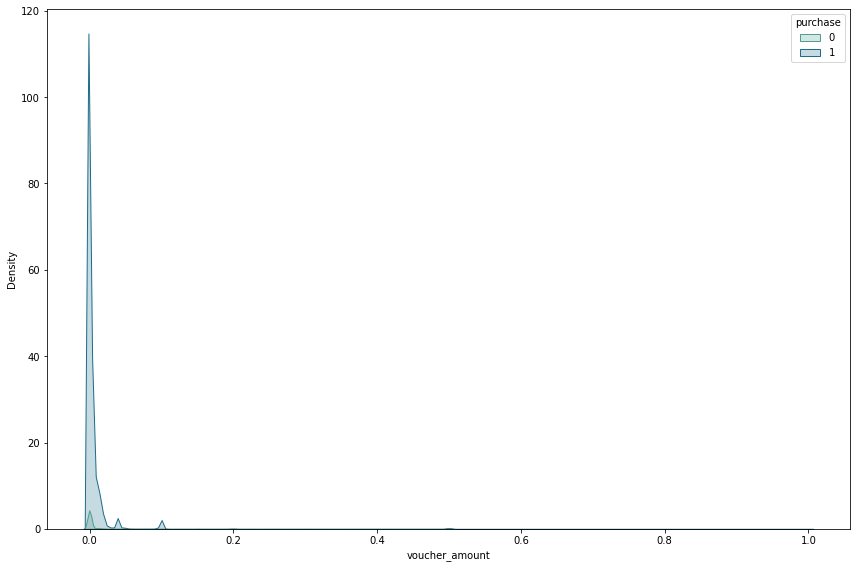

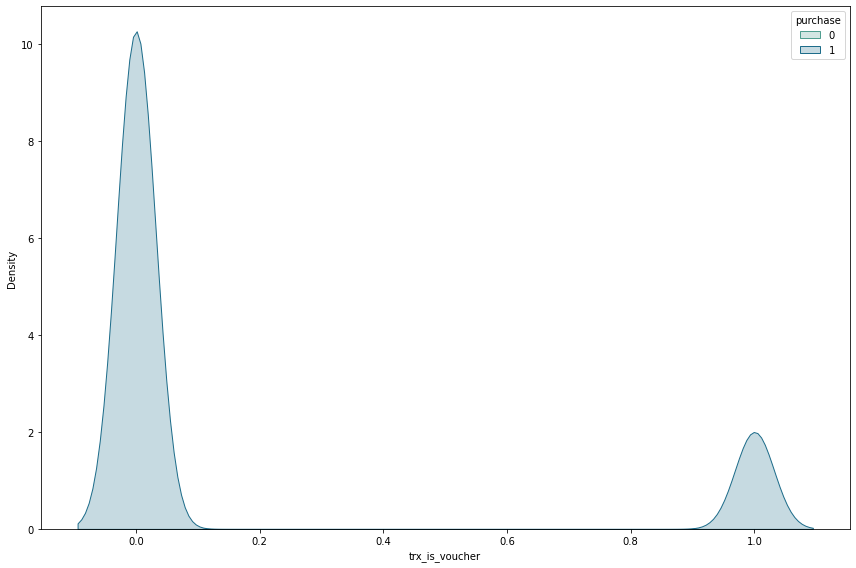

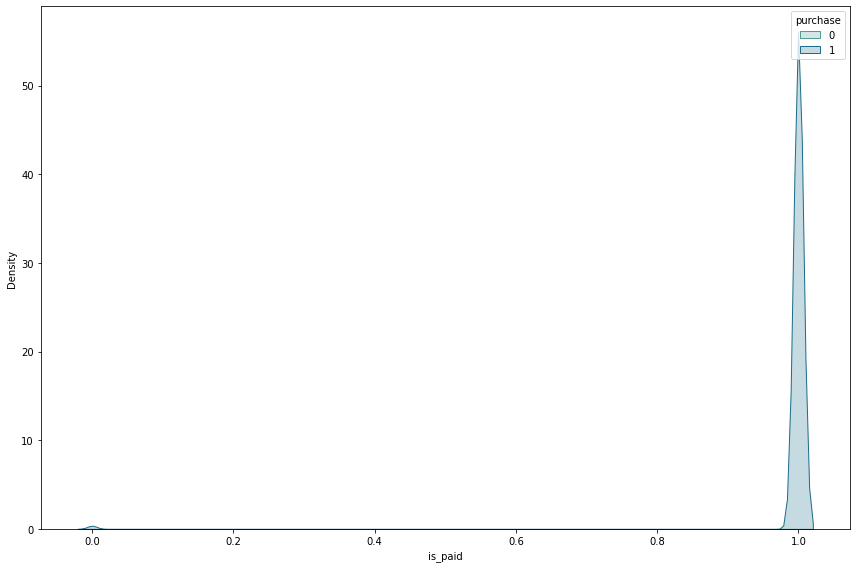

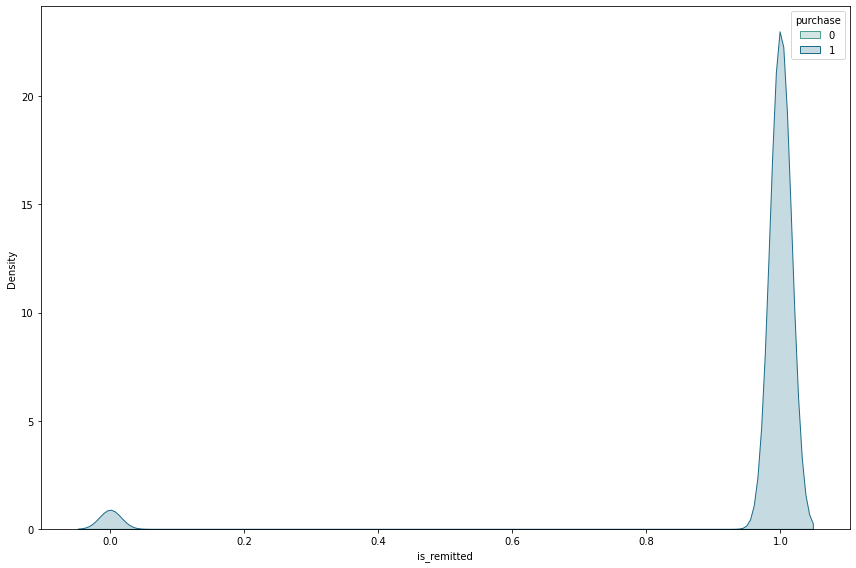

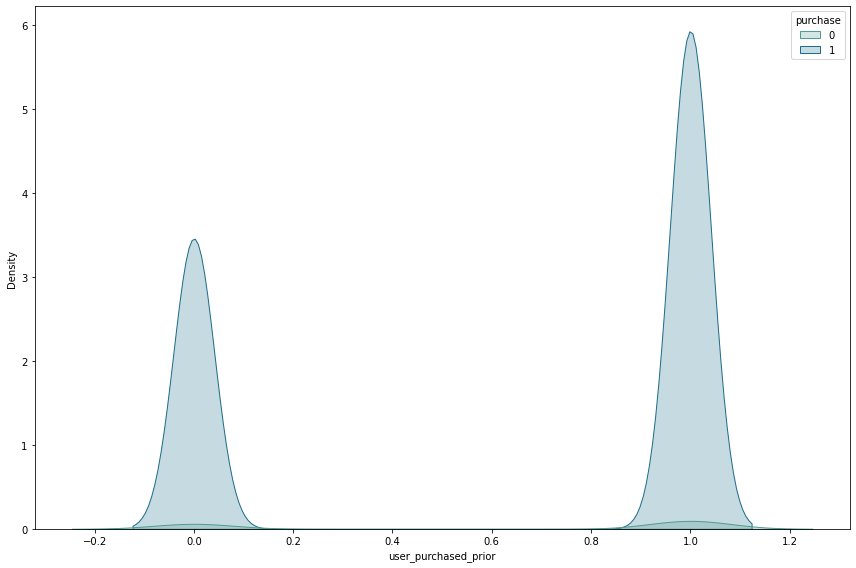

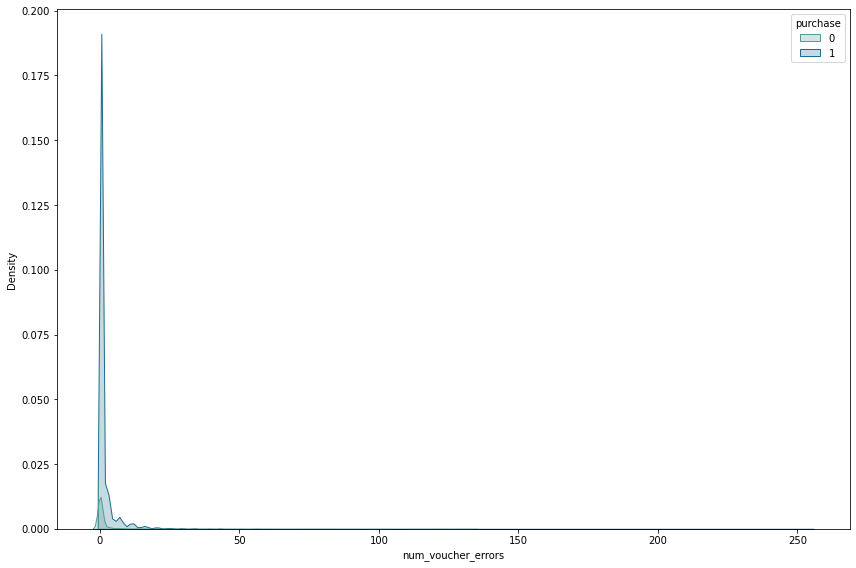

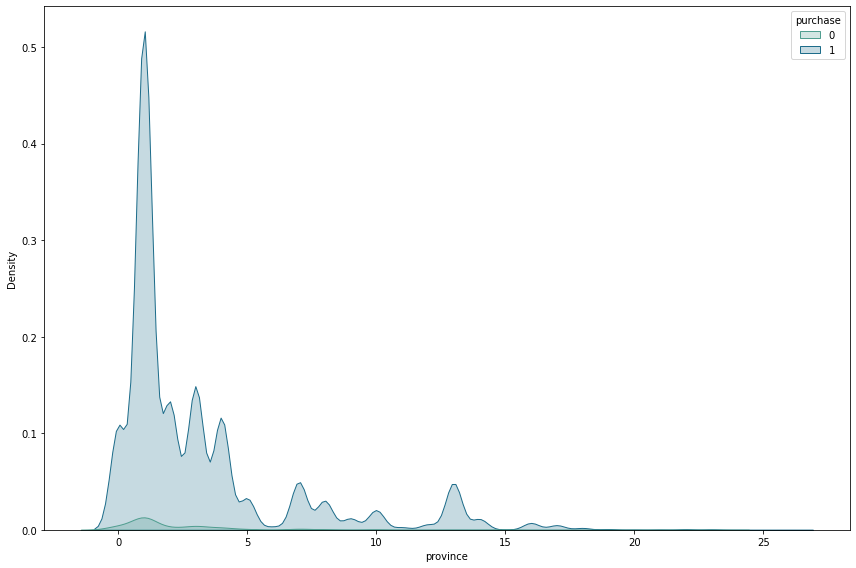

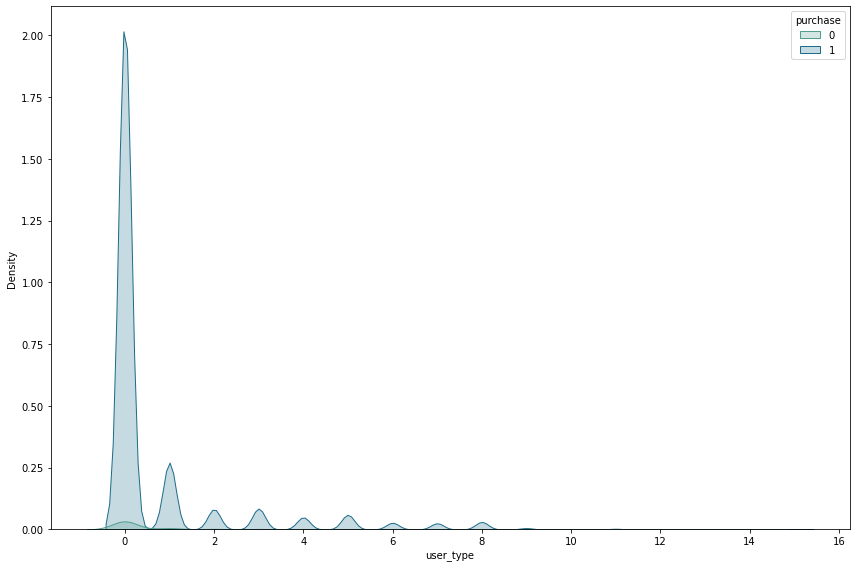

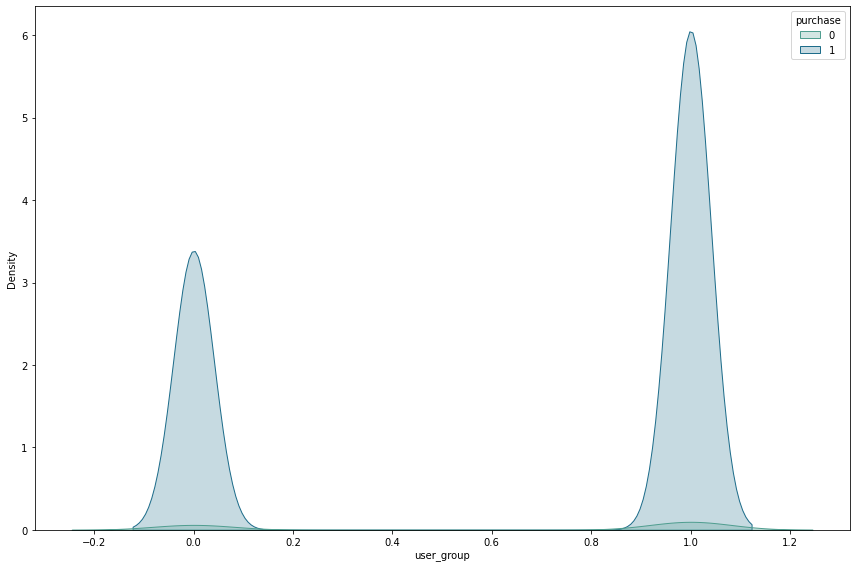

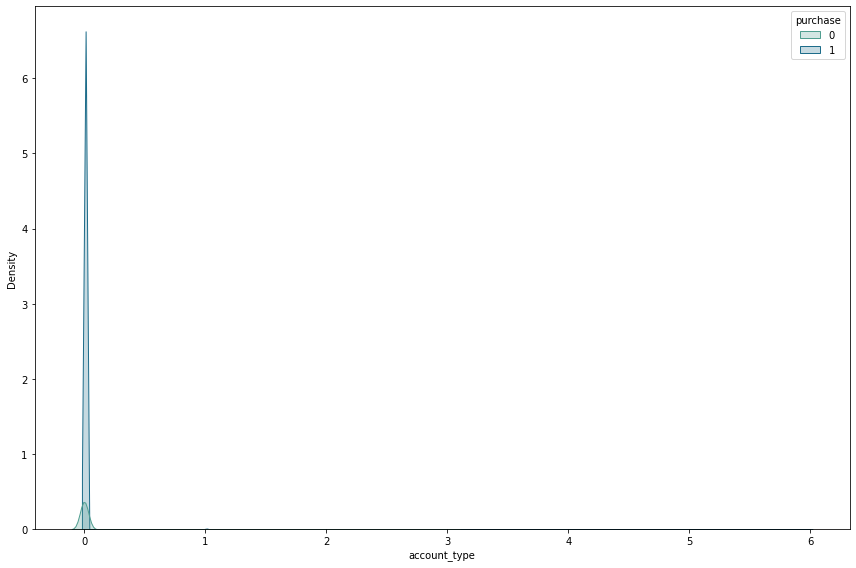

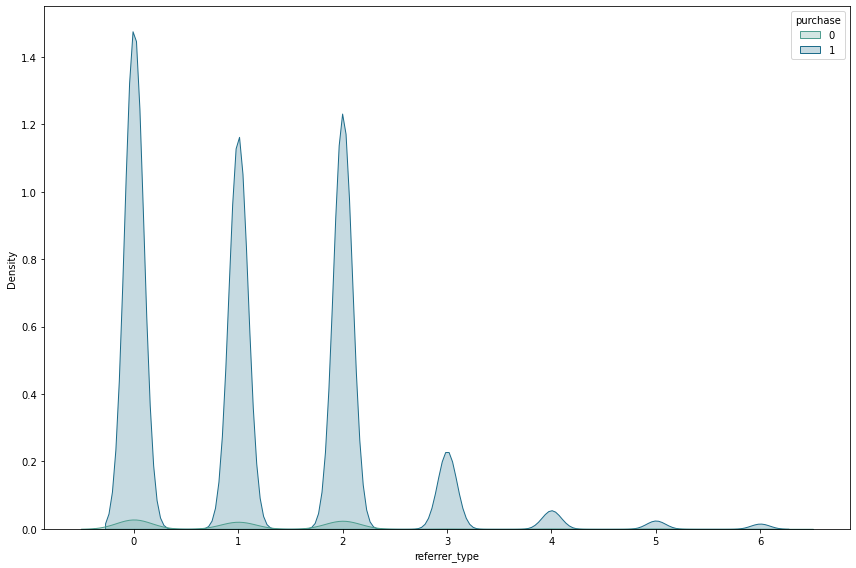

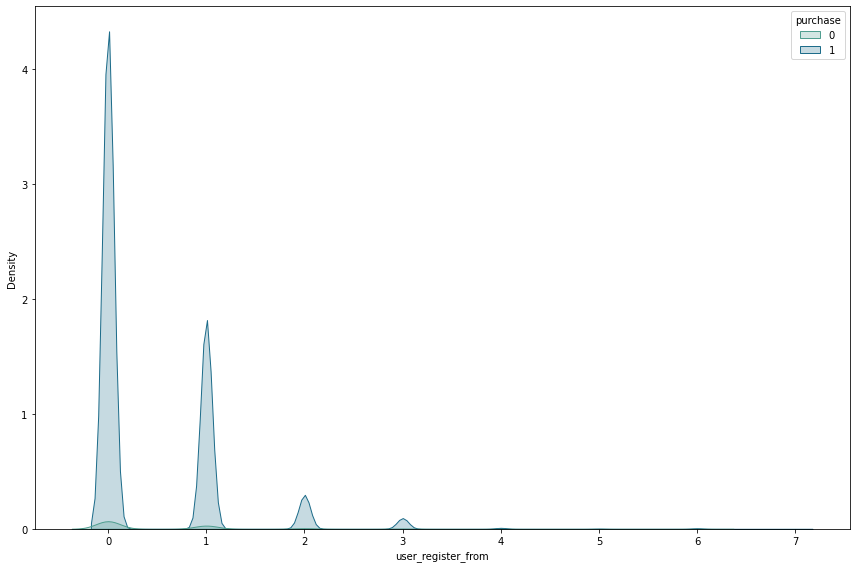

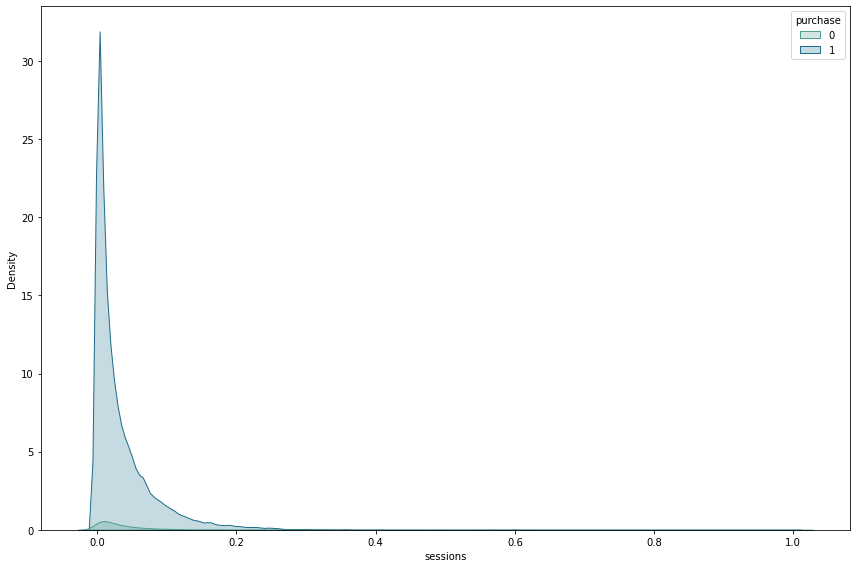

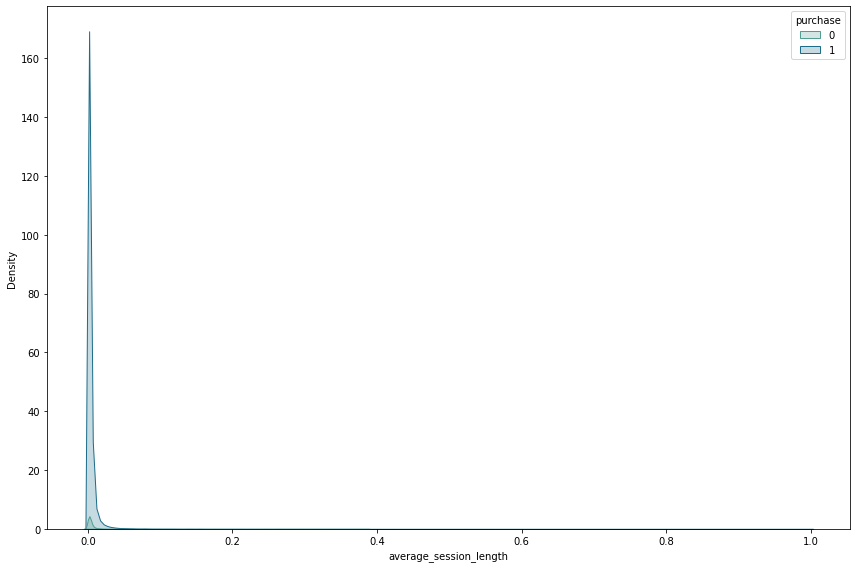

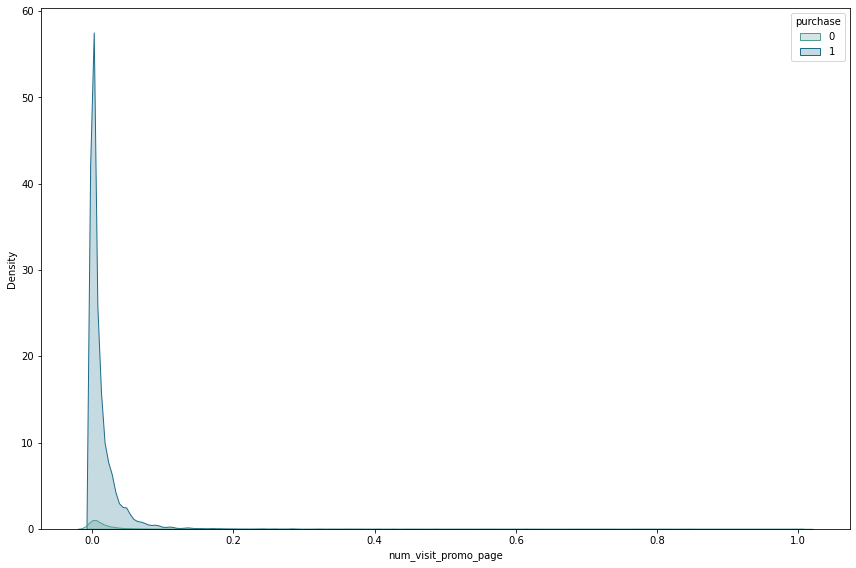

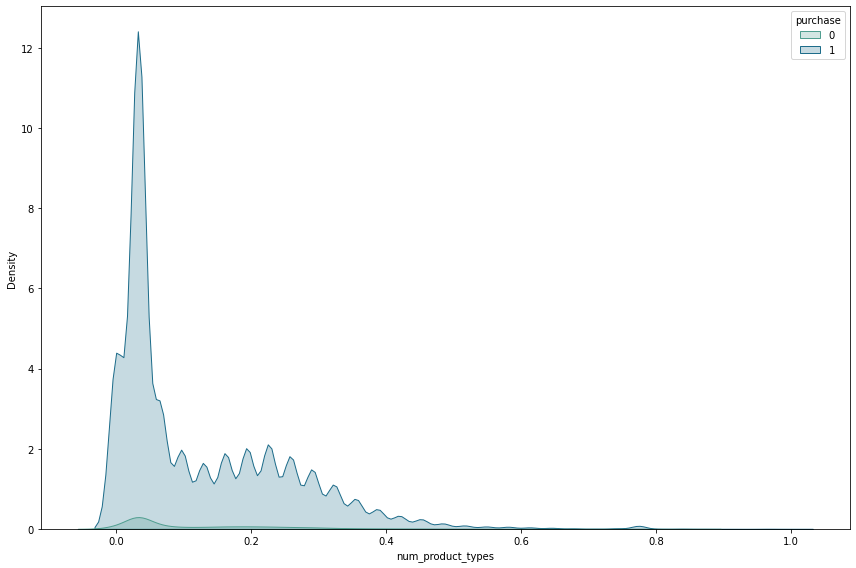

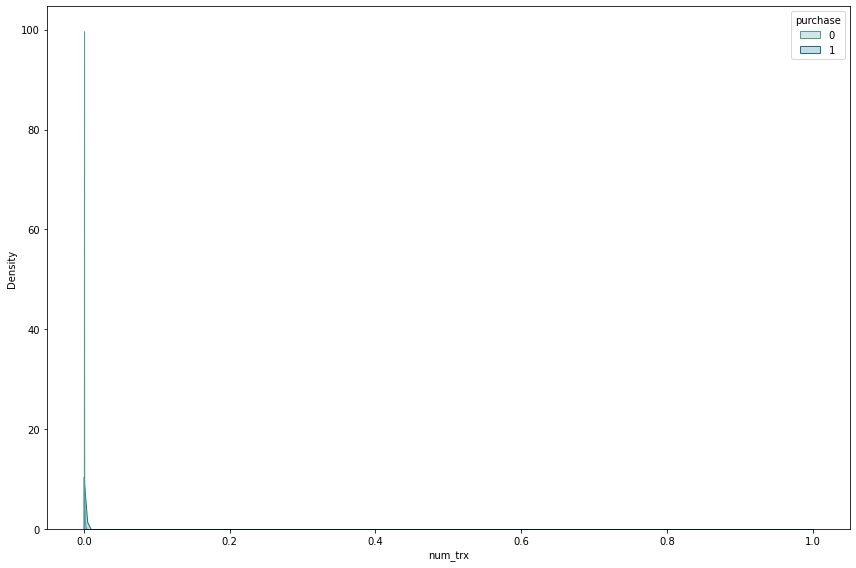

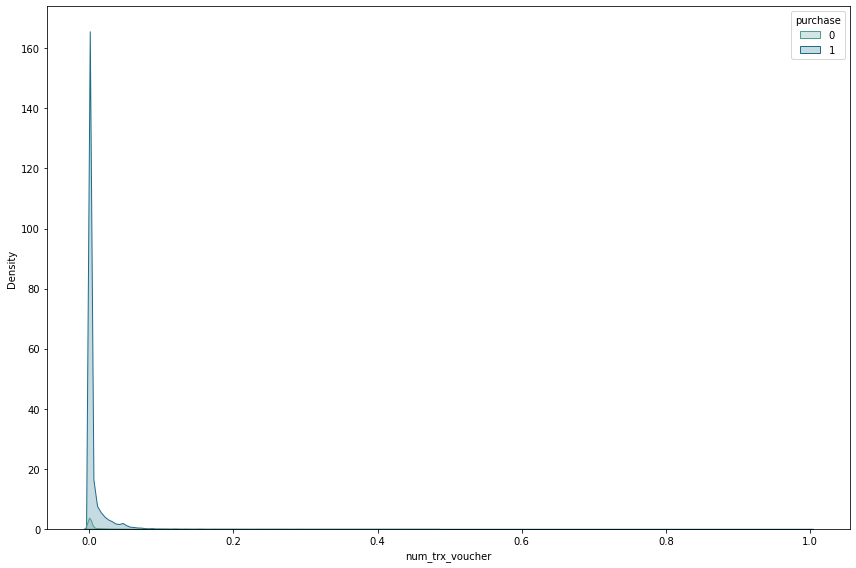

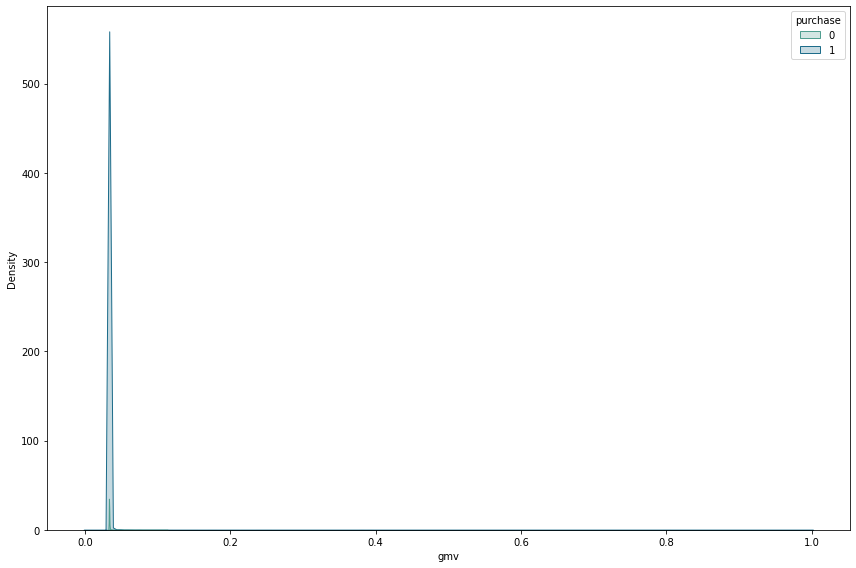

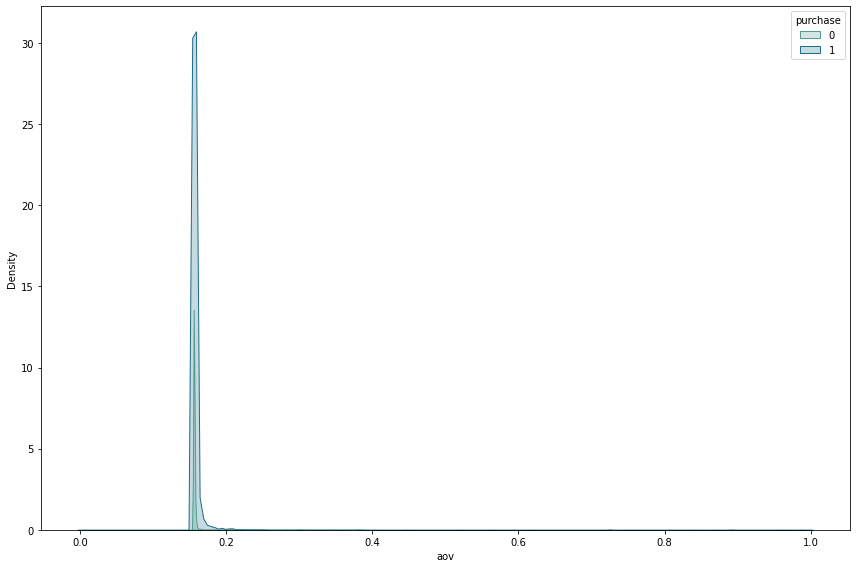

In [ ]:
for column in numeric_columns:
    if column != 'purchase':
        plt.figure(figsize=(12,8))
        sns.kdeplot(data=df_dummy, x=column, hue='purchase', palette="crest", fill=True)
        plt.show()

In [ ]:
df_new['voucher_type'].unique()

array([1., 0.])

In [ ]:
df_new['voucher_type'].nunique()

2

**Modelling**

In [105]:
def moving_average(series, n):
  return np.average(series[-n:])

moving_average(df['basket_amount'], 24)

3.7463299066666665e-05

In [106]:
def moving_average(series, n):
  return np.average(series[-n:])

moving_average(df['basket_amount'], 50)

4.297655529400001e-05

In [107]:
def moving_average(series, n):
  return np.average(series[-n:])

moving_average(df['basket_amount'], 100)

4.470260085399999e-05

In [108]:
df_nw = df.dropna()
df_nw

,user_id,date,account_create_date,account_age (days),is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
226245,460252791,2015-03-20,2014-07-02,261,0,2015-03-20 20:08:29.756000+00:00,1.0,1.0,0.000031,0.00040,...,2014-07-02 01:36:32+00:00,0,0.039226,0.001207,0.054054,0.032258,0.000029,0.009238,0.033448,0.157678
65473,82188225,2015-03-20,2013-02-18,760,0,2015-03-20 19:53:18.369000+00:00,1.0,1.0,0.000014,0.00040,...,2013-02-18 09:02:16+00:00,1,0.111171,0.001286,0.033784,0.258065,0.000804,0.018476,0.033726,0.155795
186422,133829390,2015-03-20,2013-08-19,578,0,2015-03-20 17:06:44.298000+00:00,1.0,1.0,0.000029,0.00040,...,2013-08-19 06:59:15+00:00,1,0.259400,0.001200,0.060811,0.483871,0.003537,0.027714,0.038840,0.156082
215846,504476396,2015-03-20,2014-10-09,162,0,2015-03-20 17:36:04.158000+00:00,1.0,1.0,0.000002,0.00040,...,2014-10-09 08:12:38+00:00,0,0.009038,0.009717,0.020270,0.129032,0.000045,0.018476,0.034065,0.160979
84870,95944470,2015-03-20,2013-04-15,704,0,2015-03-20 18:19:06.201000+00:00,1.0,1.0,0.000003,0.00040,...,2013-04-15 03:16:10+00:00,3,0.096529,0.001256,0.020270,0.258065,0.000534,0.034642,0.034148,0.156116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139749,628175461,2015-06-19,2015-06-19,0,1,2015-06-19 06:48:33.095000+00:00,0.0,1.0,0.000009,0.00003,...,2015-06-19 04:21:02+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033242,0.155619
66864,140712365,2015-06-19,2013-09-05,652,0,2015-06-19 12:03:55.371000+00:00,1.0,1.0,0.000009,0.00002,...,2013-09-05 06:12:35+00:00,1,0.014461,0.005108,0.067568,0.129032,0.000151,0.002309,0.033252,0.155638
179681,138870302,2015-06-19,2013-08-31,657,0,2015-06-19 05:50:49.236000+00:00,1.0,1.0,0.000026,0.00002,...,2013-08-31 02:00:27+00:00,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033242,0.155619
139754,628368413,2015-06-19,2015-06-19,0,1,2015-06-19 15:35:14.159000+00:00,0.0,1.0,0.000009,0.00003,...,2015-06-19 14:45:48+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033242,0.155619


In [127]:
purchase_1= df_nw[df_nw['purchase']== 1]
purchase_1.head() #users who make purchase

,user_id,date,account_create_date,account_age (days),is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,...,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
226245,460252791,2015-03-20,2014-07-02,261,0,2015-03-20 20:08:29.756000+00:00,1.0,1.0,0.000031,0.0004,...,2014-07-02 01:36:32+00:00,0,0.039226,0.001207,0.054054,0.032258,0.000029,0.009238,0.033448,0.157678
186422,133829390,2015-03-20,2013-08-19,578,0,2015-03-20 17:06:44.298000+00:00,1.0,1.0,0.000029,0.0004,...,2013-08-19 06:59:15+00:00,1,0.259400,0.001200,0.060811,0.483871,0.003537,0.027714,0.038840,0.156082
215846,504476396,2015-03-20,2014-10-09,162,0,2015-03-20 17:36:04.158000+00:00,1.0,1.0,0.000002,0.0004,...,2014-10-09 08:12:38+00:00,0,0.009038,0.009717,0.020270,0.129032,0.000045,0.018476,0.034065,0.160979
84870,95944470,2015-03-20,2013-04-15,704,0,2015-03-20 18:19:06.201000+00:00,1.0,1.0,0.000003,0.0004,...,2013-04-15 03:16:10+00:00,3,0.096529,0.001256,0.020270,0.258065,0.000534,0.034642,0.034148,0.156116
196003,146873610,2015-03-20,2013-09-14,552,0,2015-03-20 21:15:25.603000+00:00,1.0,1.0,0.000056,0.0004,...,2013-09-14 06:26:43+00:00,1,0.001808,0.076186,0.013514,0.193548,0.000074,0.034642,0.034884,0.162093


In [128]:
rfm = purchase_1.groupby('user_id').agg({'purchase' :'sum', 'trx_is_voucher': 'sum', 'basket_amount': 'sum'})
rfm.columns = ['purchase', 'Trx_is_voucher', 'basket_amount']
rfm=rfm.sort_values('purchase')                                

In [129]:
rfm

,purchase,Trx_is_voucher,basket_amount
user_id,,,
4148,1,1,0.000032
607500078,1,1,0.000010
607496591,1,1,0.000023
607487747,1,1,0.000023
607485610,1,1,0.000023
...,...,...,...
372071043,32,32,0.005433
2359810,33,32,0.003504
607379603,34,34,0.002723


# Costumer Segmentation

In [130]:
rfm_segmentation = rfm.copy()

In [131]:
from sklearn.preprocessing import StandardScaler
# feature columns
columns_name = ['purchase', 'Trx_is_voucher', 'basket_amount']

# standardized df for training
standardized_data = rfm_segmentation

# standardization
scaler = StandardScaler()
scaler.fit(rfm_segmentation[columns_name])
standardized_features = scaler.transform(rfm_segmentation[columns_name])
standardized_data[columns_name] = standardized_features

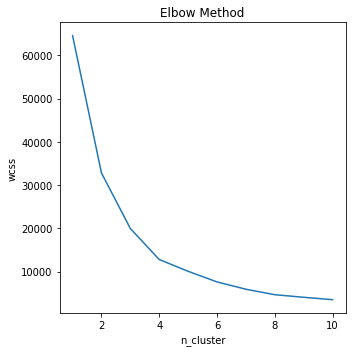

In [132]:
#Elbow Graph

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(standardized_data[columns_name])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [133]:
kmeans1 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(standardized_data[columns_name])
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [139]:
rfm['cluster']=labels1
rfm.head()

,purchase,Trx_is_voucher,basket_amount,cluster
user_id,,,,
4148,1,1,0.000032,0
607500078,1,1,0.000010,0
607496591,1,1,0.000023,0
607487747,1,1,0.000023,0
607485610,1,1,0.000023,0


In [138]:
rfm.tail()

,purchase,Trx_is_voucher,basket_amount,cluster
user_id,,,,
372071043,32,32,0.005433,3
2359810,33,32,0.003504,3
607379603,34,34,0.002723,3
132287846,39,38,0.005115,3
350553855,39,38,0.005302,3


In [136]:
rfm['cluster'].value_counts()

0    19809
2     1395
3      316
1       11
Name: cluster, dtype: int64

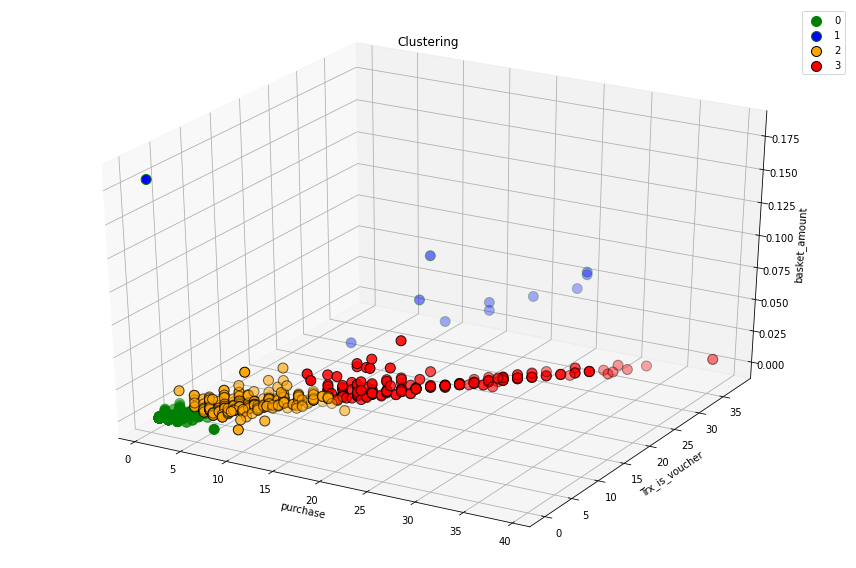

In [137]:
#visualisasi 3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['purchase'][rfm.cluster == 0], 
           rfm['Trx_is_voucher'][rfm.cluster == 0],
           rfm['basket_amount'][rfm.cluster == 0],
           c='green', s=100, edgecolor='green',label='0')
ax.scatter(rfm['purchase'][rfm.cluster == 1], 
           rfm['Trx_is_voucher'][rfm.cluster == 1],
           rfm['basket_amount'][rfm.cluster == 1],
           c='blue', s=100, edgecolor='green', label='1')
ax.scatter(rfm['purchase'][rfm.cluster == 2], 
           rfm['Trx_is_voucher'][rfm.cluster == 2],
           rfm['basket_amount'][rfm.cluster == 2],
           c='orange', s=100, edgecolor='k', label='2')
ax.scatter(rfm['purchase'][rfm.cluster == 3], 
           rfm['Trx_is_voucher'][rfm.cluster == 3],
           rfm['basket_amount'][rfm.cluster == 3],
           c='red', s=100, edgecolor='k', label='3')


plt.title('Clustering')
plt.xlabel('purchase')
plt.ylabel('Trx_is_voucher')
ax.set_zlabel('basket_amount')
plt.legend()

plt.show()
           

findings :

cluster 0 = don't use voucher when purchasing
cluster 1 = rarely use voucher when purchasing
cluster 2 = use voucher when purchasing
cluster 3 = very often use voucher when purchasing

# Classification wheter a customer will purchase or not based on some variables

In [140]:
corr = df_dummy.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,account_age (days),is_new,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,user_type,user_group,account_type,referrer_type,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
account_age (days),1.00,-0.30,0.26,-0.15,0.00,0.00,-0.12,-0.02,-0.08,-0.17,-0.01,-0.02,0.17,0.07,-0.01,-0.19,0.03,0.10,0.04,-0.15,0.61,0.29,-0.02,0.15,0.43,0.08,0.12,0.03,-0.01
is_new,-0.30,1.00,-0.80,0.13,-0.01,-0.01,0.33,-0.01,0.00,0.15,0.01,0.00,-0.50,-0.07,0.02,0.07,0.06,-0.05,0.01,0.10,-0.20,-0.25,-0.08,-0.15,-0.31,-0.05,-0.12,-0.03,-0.03
voucher_type,0.26,-0.80,1.00,nan,0.06,0.01,-0.43,0.14,0.11,-0.04,0.04,0.02,0.42,0.07,0.01,0.29,-0.10,0.25,0.03,0.20,0.18,0.21,0.12,0.14,0.36,0.14,0.30,0.10,0.12
voucher_valid,-0.15,0.13,nan,1.00,0.03,-0.15,0.03,-0.13,0.13,0.68,0.27,0.24,-0.08,-0.36,0.15,0.15,0.05,-0.14,0.01,-0.05,-0.13,-0.18,0.02,-0.09,-0.16,-0.09,0.03,0.02,0.04
basket_amount,0.00,-0.01,0.06,0.03,1.00,-0.00,-0.00,0.01,0.05,0.01,-0.01,-0.01,0.00,0.00,-0.01,0.01,0.00,-0.00,0.04,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.00,0.01,0.28,0.33
voucher_max_amount,0.00,-0.01,0.01,-0.15,-0.00,1.00,-0.00,0.93,0.01,-0.00,-0.02,-0.01,-0.01,0.04,-0.01,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,-0.00,0.02,0.02,0.00,0.01,0.00,0.00
voucher_percentage,-0.12,0.33,-0.43,0.03,-0.00,-0.00,1.00,0.01,0.06,0.34,-0.00,0.00,-0.19,-0.01,0.01,-0.00,0.04,-0.14,-0.01,-0.10,-0.08,-0.09,0.01,-0.04,-0.10,-0.02,-0.02,-0.01,-0.01
voucher_min_purchase,-0.02,-0.01,0.14,-0.13,0.01,0.93,0.01,1.00,0.30,0.12,-0.02,-0.01,-0.01,0.06,-0.00,0.06,0.00,-0.02,0.00,-0.00,-0.01,-0.00,0.00,0.02,0.02,0.00,0.08,0.03,0.05
voucher_amount,-0.08,0.00,0.11,0.13,0.05,0.01,0.06,0.30,1.00,0.40,-0.00,0.01,-0.01,0.02,0.02,0.20,0.01,-0.09,0.02,-0.01,-0.05,-0.06,0.02,0.02,0.00,-0.01,0.19,0.11,0.19
trx_is_voucher,-0.17,0.15,-0.04,0.68,0.01,-0.00,0.34,0.12,0.40,1.00,0.09,0.09,-0.16,0.01,0.08,0.32,0.07,-0.23,0.00,-0.12,-0.11,-0.13,0.04,-0.01,-0.06,-0.02,0.25,0.02,0.04


In [141]:
#variables separation
y = df_new['purchase']
x = (df_new._get_numeric_data()).drop(['purchase'], axis=1)

## Logistic Regression

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=29)

# load the algorithm
model = LogisticRegression(max_iter=1000)

# train the data
model.fit(x_train, y_train)

# predict the y using trained model
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [147]:
# evaluate classification model - accuracy
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Test Data: 0.992667867249807


In [148]:
# classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       120
           1       1.00      1.00      1.00      7654

    accuracy                           0.99      7774
   macro avg       0.88      0.89      0.88      7774
weighted avg       0.99      0.99      0.99      7774



In [145]:
# import stats library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# indicate which variables to compute VIF
new_x = x

# add intercept
new_x['intercept'] = 1

# compute VIF
vif = pd.DataFrame()
vif["variables"] = new_x.columns
vif["VIF"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]

# output
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,is_new,4.059021
1,voucher_type,3.099668
2,voucher_valid,0.000000
3,basket_amount,1.279076
4,voucher_max_amount,1.320449
5,voucher_percentage,1.538253
6,voucher_min_purchase,2.579763
7,voucher_amount,2.808558
8,trx_is_voucher,1.542843
9,is_paid,2.697667


# XGB Classification

In [154]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from xgboost import XGBClassifier

In [156]:
model =XGBClassifier(random_state = 11)

model.fit(x_train, y_train)
print(model.score(x_test, y_test))
y_predict = model.predict(x_test)
print (metrics.accuracy_score(y_test, y_predict))

0.9835348597890404
0.9835348597890404


In [151]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[  96   24]
 [  24 7630]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       120
           1       1.00      1.00      1.00      7654

    accuracy                           0.99      7774
   macro avg       0.90      0.90      0.90      7774
weighted avg       0.99      0.99      0.99      7774



# Random Forest Classification

In [157]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9930537689735014


In [153]:
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

[[ 102   26]
 [  28 7618]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       128
           1       1.00      1.00      1.00      7646

    accuracy                           0.99      7774
   macro avg       0.89      0.90      0.89      7774
weighted avg       0.99      0.99      0.99      7774



# ADA Boost

In [158]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9927965011577051

In [ ]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 109   19]
 [  37 7609]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       128
           1       1.00      1.00      1.00      7646

    accuracy                           0.99      7774
   macro avg       0.87      0.92      0.90      7774
weighted avg       0.99      0.99      0.99      7774

